# Projet Machine Learning - Groupe 1 - Notebook Python

Promotion 58 - 4GMM, Année universitaire 2023-2024 

Julia Manon (B), Piot Damien (A), Dumas Thomas (B), Ben Abdallah Selim (A)


Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Global Data on Sustainable Energy" (2000-2020) disponible ici: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy.

Le jeu de données comprend 3649 observations et 21 variables, qui représentent diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.

Les variables sont les suivantes:\
• **Entity** : Nom du pays ou de la région pour lequel les données sont rapportées.\
• **Year** : Année pour laquelle les données sont communiquées, entre 2000 et 2020.\
• **Access to electricity (% of population)** : Pourcentage de la population ayant accès à l’électricité.\
• **Access to clean fuels for cooking (% of population)** : Pourcentage de la population qui utilise principalement des combustibles propres.\
• **Renewable-electricity-generating-capacity-per-capita** : Capacité installée d’énergie renouvelable par personne.\
• **Financial flows to developing countries (US Dollars)** : Aide et assistance des pays développés pour les projets d’énergie propre.\
• **Renewable energy share in total final energy consumption (%)** : Pourcentage d’énergie renouve- lable dans la consommation d’énergie finale.\
• **Electricity from fossil fuels (TWh)** : Électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures.\
• **Electricity from nuclear (TWh)** : Électricité produite à partir de l’énergie nucléaire en térawattheures.\
• **Electricity from renewables (TWh)** : Électricité produite à partir de sources renouvelables (hydroélec-
tricité, énergie solaire, énergie éolienne, etc.) en térawattheures.\
• **Low-carbon electricity (% electricity)** : Pourcentage d’électricité provenant de sources à faible teneur en carbone (nucléaire et énergies renouvelables).\
• **Primary energy consumption per capita (kWh/person)** : Consommation d’énergie par personne en kilowattheures.
• **Energy intensity level of primary energy (MJ/2011 PPP GDP)** : Consommation d’énergie par unité de PIB à parité de pouvoir d’achat.\
• **Value-co2-emissions (metric tons per capita)** : Émissions de dioxyde de carbone par personne en tonnes métriques.\
• **Renewables (% equivalent primary energy)** : Équivalent énergie primaire provenant de sources re- nouvelables.\
• **GDP growth (annual %)** : Taux de croissance annuel du PIB en monnaie locale constante.\
• **GDP per capita** : Produit intérieur brut (PIB) par personne.\
• **Density (P/Km2)** : Densité de population en personnes par kilomètre carré.\
• **Land Area (Km2)** : Surface terrestre totale en kilomètres carrés.\
• **Latitude** : Latitude du centroïde du pays en degrés décimaux.\
• **Longitude** : Longitude du centroïde du pays en degrés décimaux.

Il est à noter que dans la documentation, la variable **Value-co2-emissions (metric tons per capita)** représnte les émissions de dioxyde de carbone par personne en kilo-tonnes métriques. Cependant, lorsque nous regardons les valeurs, il semble plus probable est cohérent que cette valeur soit donnée à l'échelle nationale. En reportant cette valeur par habitant en utilisant la superficie des pays et la densité, les valeurs calculées sont plus cohérentes en émissions par personnes.

---

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables. Attention : Le jeu de données comporte beaucoup de valeurs manquantes, une étude exploratoire préalable est plus que jamais nécessaire pour se familiariser avec les données et les préparer à la phase de modélisation.

Pour ce faire, nous allons commencer par prendre en main les données et réaliser une analyse exploiratoire de celles-ci. Plus précisément, nous prendrons nos données en mains, nous réaliserons des analyses unidimensionnelles et multidimensionnelles, une étude des corrélation et une ACP. Puis, dans une seconde partie, nous ... ( A completer) 

# 1 - Prise en main des données et analyse exploratoire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats

%matplotlib inline

## 1.1 - Prise en main du jeu de données

### 1.1.1 - Ouverture du jeu de données

In [2]:
# Lecture des données
pd.set_option('display.max_columns', None) # Affichage de toutes les colonnes du dataframe
path=""
data=pd.read_csv(path+"global-data-on-sustainable-energy .csv",sep=",")

# Vérification du contenu
print(data.shape)
data.head()


(3649, 21)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Interprétation : 

Les noms des colonnes sont assez compliqués, ils sont longs et contiennent des espaces. Nous allons les renommer par la suite pour simplifier le code et les appels aux colonnes. De plus, en observant un apperçu de notre dataframe, nous constatons que certaines données sont manquantes. Cela est visible par les valeurs marquées comme NaN. Pour palier cela, nous pouvons réaliser 2 traitements possibles : supprimer les données manquantes ou les estimer. Nous traiterons ces deux possibilités ultérieurement.

Nous commençons par renommer nos colonnes pour simplifier notre dataframe.

In [3]:
# Nous allons renommer les colonnes pour simplifier notre dataframe
# mon_dataframe.rename(columns={'ancien nom': 'nouveau nom'}, inplace = True)

data.rename(columns={'Access to electricity (% of population)' : 'Elec_access'}, inplace=True)
data.rename(columns={'Access to clean fuels for cooking' : 'Clean_access'}, inplace=True)
data.rename(columns={'Renewable-electricity-generating-capacity-per-capita' : 'Renewable_per_capita'}, inplace=True)
data.rename(columns={'Financial flows to developing countries (US $)' : 'Financial_flows'}, inplace=True)
data.rename(columns={'Renewable energy share in the total final energy consumption (%)' : 'Renewable_share'}, inplace=True)
data.rename(columns={'Electricity from fossil fuels (TWh)' : 'Fossil_elec'}, inplace=True)
data.rename(columns={'Electricity from nuclear (TWh)' : 'Nuclear_elec'}, inplace=True)
data.rename(columns={'Electricity from renewables (TWh)' : 'Renewable_elec'}, inplace=True)
data.rename(columns={'Low-carbon electricity (% electricity)' : 'Low_carb_elec'}, inplace=True)
data.rename(columns={'Primary energy consumption per capita (kWh/person)' : 'Energy_per_capita'}, inplace=True)
data.rename(columns={'Energy intensity level of primary energy (MJ/$2017 PPP GDP)' : 'PEnergy_intensity'}, inplace=True)
data.rename(columns={'Value_co2_emissions_kt_by_country' : 'CO2'}, inplace=True)
data.rename(columns={'Renewables (% equivalent primary energy)' : 'Renewables'}, inplace=True)
data.rename(columns={'gdp_growth' : 'Growth'}, inplace=True)
data.rename(columns={'gdp_per_capita' : 'GDP_per_capita'}, inplace=True)
data.rename(columns={data.columns[-4] : 'Density'}, inplace=True)
data.rename(columns={'Land Area(Km2)' : 'Area'}, inplace=True)

data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Interprétation : 

Nous affichons notre dataframe comme dans la cellule de code précédente. Nous constatons que les noms des colonnes sont plus simples, comme attendu.

### 1.1.2 - Etude et modification du type des colonnes

Nous allons maintenant étudier la nature des variables et leur encodage. L'idée est d'avoir un apperçu sur les variables qualitatives et celles quantitatives. 

In [4]:
# Etude des types des colonnes
data.dtypes

Entity                   object
Year                      int64
Elec_access             float64
Clean_access            float64
Renewable_per_capita    float64
Financial_flows         float64
Renewable_share         float64
Fossil_elec             float64
Nuclear_elec            float64
Renewable_elec          float64
Low_carb_elec           float64
Energy_per_capita       float64
PEnergy_intensity       float64
CO2                     float64
Renewables              float64
Growth                  float64
GDP_per_capita          float64
Density                  object
Area                    float64
Latitude                float64
Longitude               float64
dtype: object

Nous allons convertir la variable 'Year' en variable qualitative. En effet, nous souhaitons que les années de nos données soient assimilées à des modalités ou catégories. C'est pour cela que la nature qualitative est à privilégier. De plus, on observe que la densité est présentée comme une variable qualitative alors que les données de cette colonne sont numériques et expriment une quantité. Nous allons modifier la nature de la variable 'Density' pour la convertir en variable quantitative. 

In [5]:
# Transformation de la colonne 'Year' en variable qualitative  
data['Year'] = data['Year'].astype('category')
data['Entity'] = data['Entity'].astype('category')

# Traitement de la colonne 'Density'
data['Density'] = data['Density'].str.replace(',','')
data['Density'] = data['Density'].str.replace('.','')
data['Density'] = data['Density'].astype(float)

# Affichage du type des variables après traitement
data.dtypes

Entity                  category
Year                    category
Elec_access              float64
Clean_access             float64
Renewable_per_capita     float64
Financial_flows          float64
Renewable_share          float64
Fossil_elec              float64
Nuclear_elec             float64
Renewable_elec           float64
Low_carb_elec            float64
Energy_per_capita        float64
PEnergy_intensity        float64
CO2                      float64
Renewables               float64
Growth                   float64
GDP_per_capita           float64
Density                  float64
Area                     float64
Latitude                 float64
Longitude                float64
dtype: object

Interprétation : 

On obtient bien que l'entité et l'année sont des variables qualitatives et la densité est bien une variable qualitative. Cela est visible dans l'apperçu du dataframe au niveau de la densité avec une conversion des valeurs en float.

In [6]:
data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


### 1.1.3 - Etude des valeurs manquantes

Dans la partie d'ouverture du jeu de données, nous avons pu constater que certaines valeurs étaient manquantes. Nous allons donc étudier le taux de valeurs manquantes pour chaque variable. 

In [7]:
data_missing_value = data.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value*100)

--- Taux de valeurs manquantes ---
Renewables              58.563990
Financial_flows         57.248561
Renewable_per_capita    25.513839
CO2                     11.729241
Growth                   8.687312
GDP_per_capita           7.728145
PEnergy_intensity        5.672787
Renewable_share          5.316525
Clean_access             4.631406
Nuclear_elec             3.453001
Low_carb_elec            1.151000
Renewable_elec           0.575500
Fossil_elec              0.575500
Elec_access              0.274048
Latitude                 0.027405
Area                     0.027405
Density                  0.027405
Longitude                0.027405
Energy_per_capita        0.000000
Year                     0.000000
Entity                   0.000000
dtype: float64


Interprétation :

Ce mode d'affichage permet de visualiser les variables comptant la plus grande proportion de valeurs manqantes. On constante que pour les colonnes 'Renewables' et 'Financial_flows', il manque plus de la moitié des donneés. Pour la colonne 'Renewable_per_capita', il manque une donnée sur 4. 

En accord avec le sujet du projet, nous décidons de supprimer ces colonnes.

In [8]:
# Suppression des colonnes

data.drop('Renewables', axis=1, inplace=True)
data.drop('Financial_flows', axis=1, inplace=True)
data.drop('Renewable_per_capita', axis=1, inplace=True)


In [9]:
data.head()
data.shape # --> On trouve (3649, 18)

(3649, 18)

Interprétation : 

La nouvelle taille du dataframe nous confirme que nos colonnes ont bien été supprimées. 

Pour la suite de l'étude, nous souhaitons travailler sur un jeu de données ne comprenant pas de valeurs manquantes. Pour ce faire, nous allons supprimer les lignes contenant des valeurs manquantes.

In [10]:
# On veut maintenant supprimer les lignes qui contiennent des valeurs manquantes

# Suppression de toutes les lignes contenant au moins une valeur manquante
data = data.dropna(axis = 0, how = 'any')

In [11]:
print("-- Taille du dataframe après traitement --")
data.shape #(2868, 18)

-- Taille du dataframe après traitement --


(2868, 18)

Interprétation :

Notre jeu de données contient 2868 observations définies par 18 caractéristiques. Le nombre d'observations est en adéquation avec les données du sujet. 

## 1.2 - Analyse exploratoire des données

### 1.2.1 - Analyse unidimensionnelle des données


On s'intéresse dans un premier temps aux variables quantitatives. Nous allons toutes les représenter sous formz d'histogramme pour visualiser leur distribution.

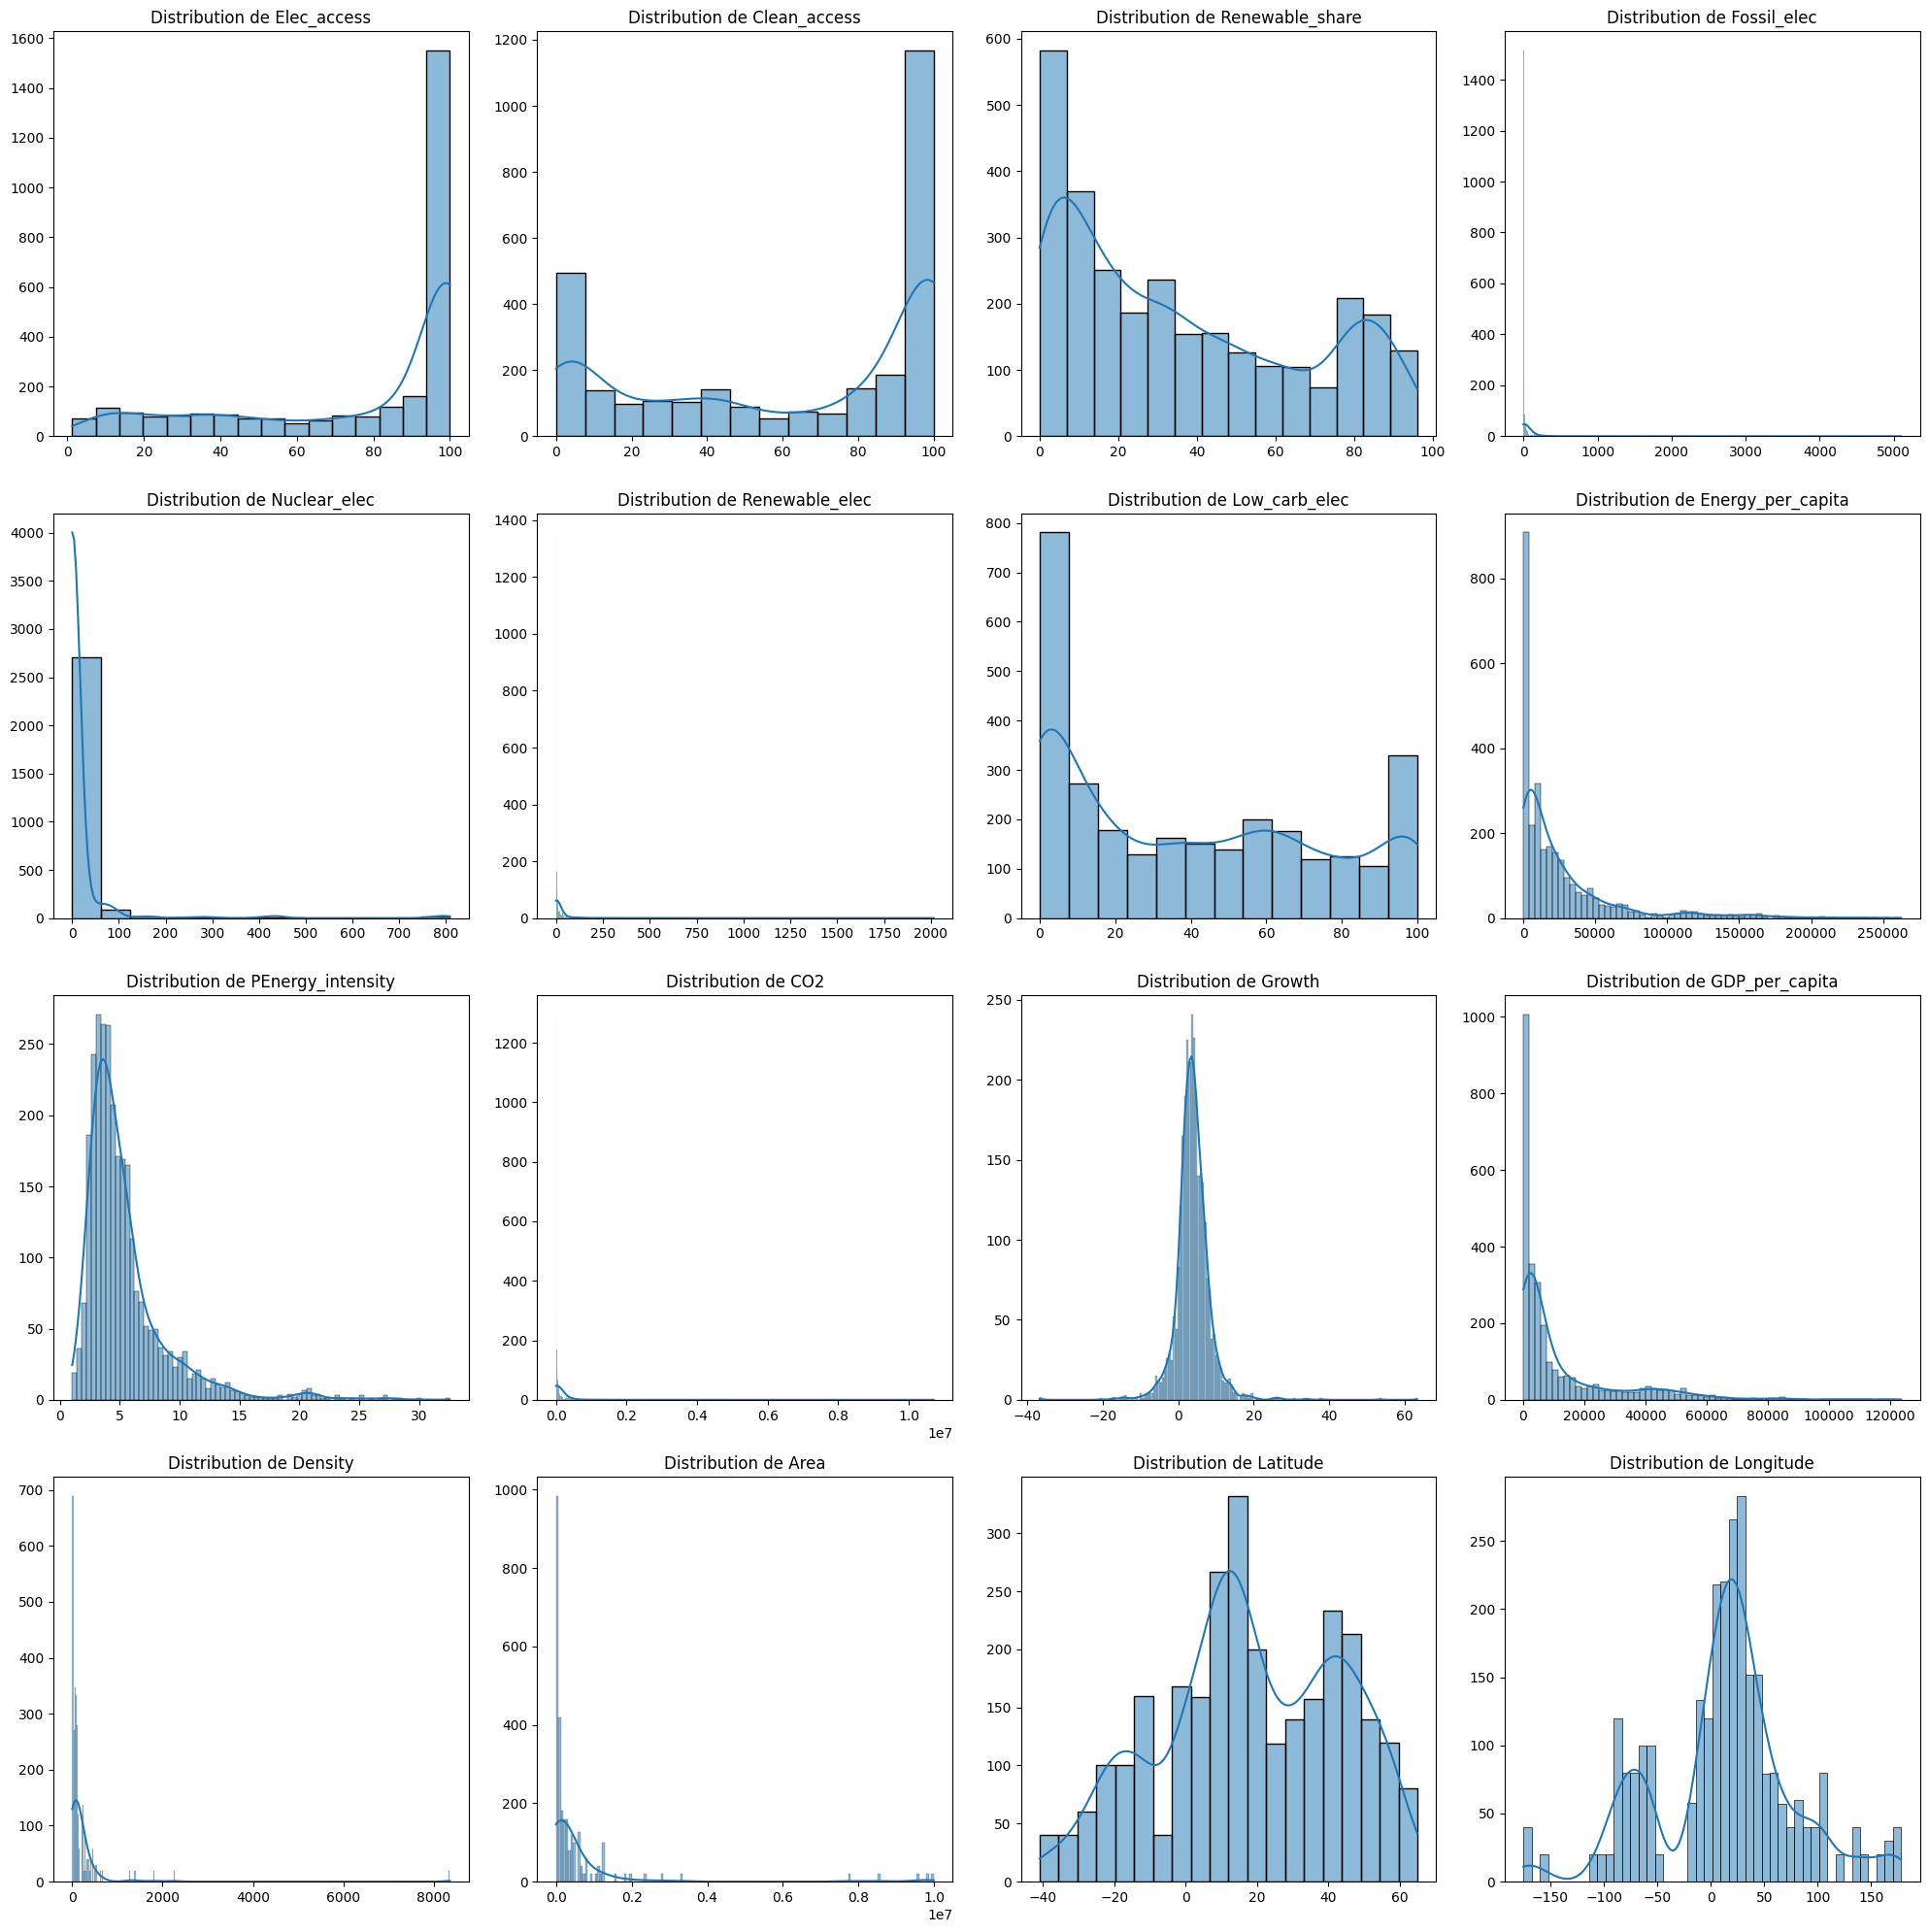

In [12]:
# Définir la taille de la figure pour les subplots
plt.figure(figsize=(20, 20))

# Sélectionner les colonnes numériques pour la visualisation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

# Définir le nombre de colonnes et de lignes pour les subplots
n_cols = 4
n_rows = (num_plots + n_cols - 1) // n_cols  # Arrondir à l'entier supérieur pour s'assurer d'avoir assez de lignes

# Créer un subplot pour chaque variable quantitative
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel('')
    plt.ylabel('')

# Ajuster l'espacement entre les subplots pour une meilleure lisibilité
plt.tight_layout()
plt.show()


L'accès à l'électricité et aux combustibles propres : L'observation de distributions bimodales ou multimodales pour ces indicateurs met en lumière des disparités notables dans l'accès aux ressources énergétiques propres à travers différents pays au fil du temps. Des concentrations marquées vers les valeurs élevées révèlent que de nombreux pays ont réussi à garantir un accès généralisé à l'électricité et aux combustibles propres pour leur population, tandis que des régions moins densément peuplées signalent des déficits significatifs dans cet accès.

Part des énergies renouvelables dans la consommation totale d'énergie : Cette variable présente une concentration de données vers le bas de l'échelle, soulignant que dans de nombreux pays, les énergies renouvelables représentent encore une fraction minime du mix énergétique. À l'opposé, une dispersion des données vers des valeurs plus élevées illustre l'ambition de certains pays d'accroître la part des énergies renouvelables.

Consommation d'énergie primaire par habitant : La distribution de cette variable, inclinée vers la droite et dotée d'une longue traîne, suggère que la majorité des pays ont une consommation d'énergie par individu relativement faible, tandis qu'un nombre restreint de nations, probablement plus industrialisées, affichent des niveaux de consommation nettement plus élevés.

Intensité énergétique et émissions de CO2 : Ces indicateurs, par leurs distributions, mettent en avant les variations en matière d'efficacité énergétique et de niveaux d'émissions de CO2 entre les pays. Une intensité énergétique élevée ou des émissions de CO2 importantes peuvent révéler une dépendance accrue aux combustibles fossiles ou une utilisation de l'énergie moins efficiente.

Croissance du PIB et PIB par habitant : L'examen de ces variables fournit des indications sur le développement économique et la répartition de la prospérité parmi les pays. Les asymétries dans ces distributions peuvent indiquer que certains pays jouissent d'une forte croissance économique et de standards de vie élevés, tandis que d'autres sont confrontés à une croissance plus modeste.

Ces analyses dévoilent des tendances, des anomalies et des domaines nécessitant une exploration plus approfondie. L'examen de la distribution de ces variables peut aussi guider les stratégies pour gérer les données manquantes, pour transformer les données, ou pour sélectionner des modèles de machine learning adaptés.

Cepandant, certains graphiques ne sont pas très visibles avec cet affichage sous forme de subplots, nous allons zoomer sur certains histogrammes

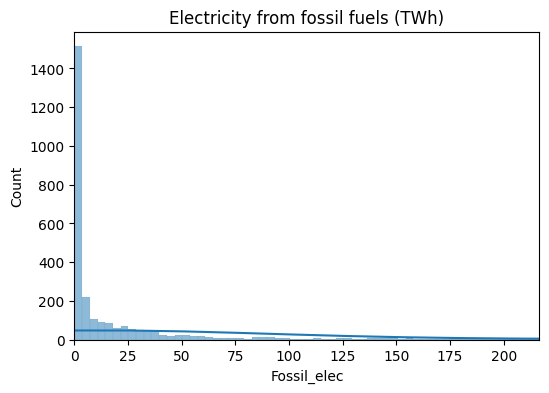

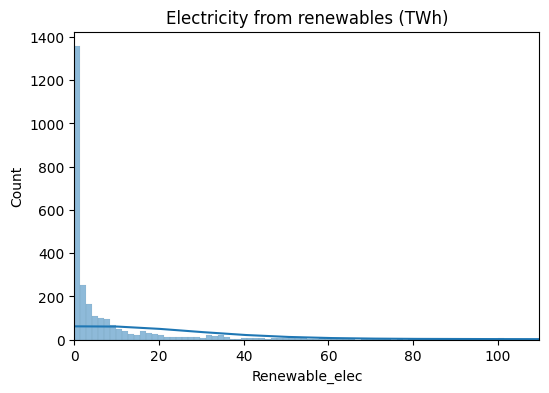

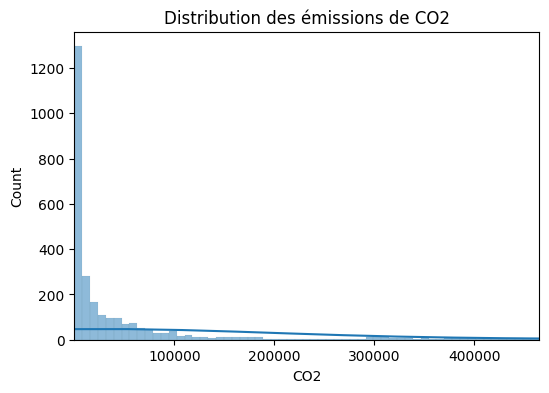

In [13]:
# Réglage de la taille de la figure pour chaque graphique
fig_size = (6, 4)

# Graphique pour 'Fossil_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Fossil_elec'], kde=True)
plt.title('Electricity from fossil fuels (TWh)')
plt.xlim(data['Fossil_elec'].min(), data['Fossil_elec'].quantile(0.95))
plt.show()

# Graphique pour 'Renewable_elec'
plt.figure(figsize=fig_size)
sns.histplot(data['Renewable_elec'], kde=True)
plt.title('Electricity from renewables (TWh)')
plt.xlim(data['Renewable_elec'].min(), data['Renewable_elec'].quantile(0.95))
plt.show()

# Graphique pour 'CO2'
plt.figure(figsize=fig_size)
sns.histplot(data['CO2'], kde=True)
plt.title('Distribution des émissions de CO2')
plt.xlim(data['CO2'].min(), data['CO2'].quantile(0.95))
plt.show()


Production d'électricité à partir de combustibles fossiles : Le graphique illustre comment la production d'électricité via les combustibles fossiles se répartit parmi différents pays et sur plusieurs années. Majoritairement, cette distribution révèle que, pour un grand nombre de cas, la production reste modeste, bien que certaines observations montrent des niveaux nettement plus importants.

Génération d'électricité via les énergies renouvelables : L'analyse de cette distribution souligne la diversité dans la production d'électricité issue des sources renouvelables. À l'image de la production basée sur les combustibles fossiles, une grande partie des données indique des productions faibles, ce qui peut témoigner des efforts de transition vers des sources d'énergie plus durables engagés par plusieurs pays.

Émissions de CO2 : La distribution des émissions de CO2 par pays montre que la majorité affiche des niveaux d'émissions relativement modestes. Toutefois, une distribution allongée vers la droite révèle l'existence de quelques pays dont les émissions de CO2 sont considérablement plus importantes, donnant lieu à une distribution asymétrique.

Ces interprétations fournissent un aperçu de la répartition globale de la production énergétique et des émissions de CO2. Elles mettent en évidence à la fois les défis persistants liés à la dépendance aux combustibles fossiles et les progrès en matière d'adoption des énergies renouvelables, ainsi que l'importante disparité des niveaux d'émissions de CO2 entre les pays.

### 1.2.2 - Transformation des variables

Avec les observations réalisées dans la partie précédente, nous pouvons nous demander s'il serait judicieux de transformer nos données. Nous pouvons nous demader ce que nous pourrions modifier sur celles-ci et ce que ces modifications pourraient apporter. 

* Réduction de l'asymétrie : Certaines de nos variables montrent une distribution asymétrique avec une queue à droite, ce qui indique une asymétrie positive. Une transformation logarithmique pourrait aider à réduire cette asymétrie, rendant la distribution plus proche d'une distribution normale. Cela est souvent une exigence ou une attente pour de nombreux modèles de régression et d'autres analyses statistiques.

* Gestion des valeurs extrêmes : Les valeurs extrêmes observées dans ces variables peuvent influencer de manière très importante les analyses statistiques et les modèles de prédiction. Les transformations peuvent réduire l'impact de ces valeurs extrêmes en les rapprochant du reste des données, améliorant ainsi la robustesse des modèles.

* Stabilisation de la variance : La variance des données peut augmenter avec l'augmentation des valeurs de la variable. Une transformation logarithmique peut aider à stabiliser la variance sur l'ensemble des données.

En résumé, pour notre projet, envisager des transformations pour ces variables quantitatives peut non seulement améliorer la qualité de nos analyses statistiques et de modélisation mais aussi aider à dériver des insights plus précis et fiables à partir de nos données. En particulier, une transformation logarithmique pourrait être une bonne piste d'amélioration.

Nous allons appliquer cette transformation logarithmique sur les colonnes suivantes : 'Fossil_elec', 'Renewable_elec', 'Energy_per_capita' et 'CO2'.

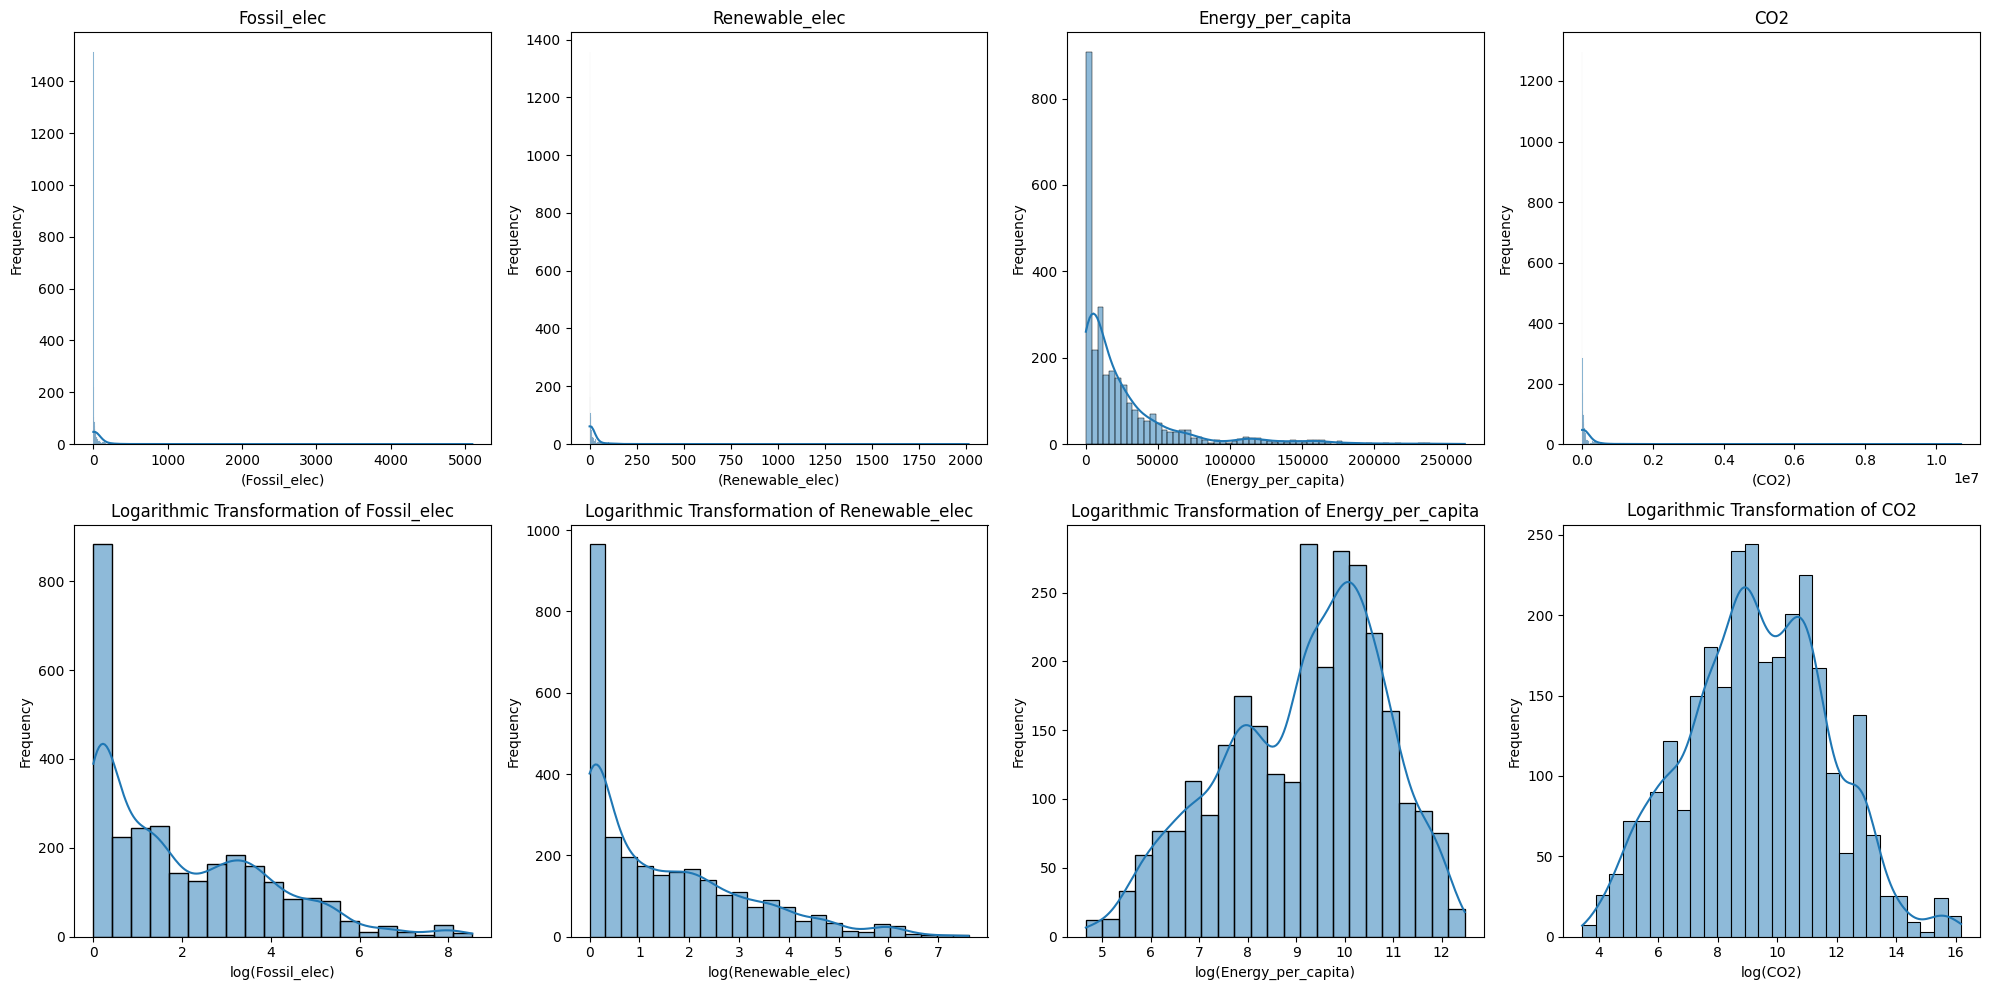

In [14]:
# Liste des colonnes à transformer
columns_to_transform = [
    'Fossil_elec', 
    'Renewable_elec', 
    'Energy_per_capita', 
    'CO2'
]

# Appliquer la transformation logarithmique avec ajustement pour les valeurs nulles
for col in columns_to_transform:
    data[f'log_{col}'] = np.log(data[col] + 1)  # +1 pour gérer les valeurs de 0

# Visualiser les distributions après transformation
plt.figure(figsize=(20, 10))

for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col}')
    plt.xlabel(f'({col})')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 4, 4+i)
    sns.histplot(data[f'log_{col}'], kde=True)
    plt.title(f'Logarithmic Transformation of {col}')
    plt.xlabel(f'log({col})')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()


In [15]:
# data.drop('log_Fossil_elec', axis=1, inplace=True)
# data.drop('log_Renewable_elec', axis=1, inplace=True)
# data.drop('log_Energy_per_capita', axis=1, inplace=True)
# data.drop('log_CO2', axis=1, inplace=True)
# data.shape

Homogénéisation des Distributions : Les distributions relatives à la production d'électricité issue des combustibles fossiles, à celle provenant des énergies renouvelables (exprimée en TWh), à la consommation d'énergie primaire par habitant, ainsi qu'aux émissions de CO2, se sont rapprochées d'une forme plus symétrique, s'alignant ainsi sur une distribution normale. Ce constat est cohérent à nos prévisions.

Atténuation des Valeurs Extrêmes : Grâce à la transformation logarithmique, l'impact des valeurs extrêmes sur les distributions a été modéré. Ceci a pour effet de rendre ces distributions moins biaisées, ce qui pourrait simplifier l'usage de méthodes statistiques et de modélisation présupposant une distribution normale des données.

Optimisation de la Modélisation : Les ajustements apportés via ces transformations peuvent contribuer à améliorer l'efficacité des modèles de prévision. En effet, ils tendent à linéariser les relations entre variables et à homogénéiser la variance des résidus, deux conditions favorables à la robustesse des modèles statistiques.

Ces observations mettent en lumière l'utilité des transformations logarithmiques pour la préparation des données, notamment en vue de leur analyse statistique et de leur modélisation.

### 1.2.3 - Etude des émissions de CO2

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_122240\2175035840.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)


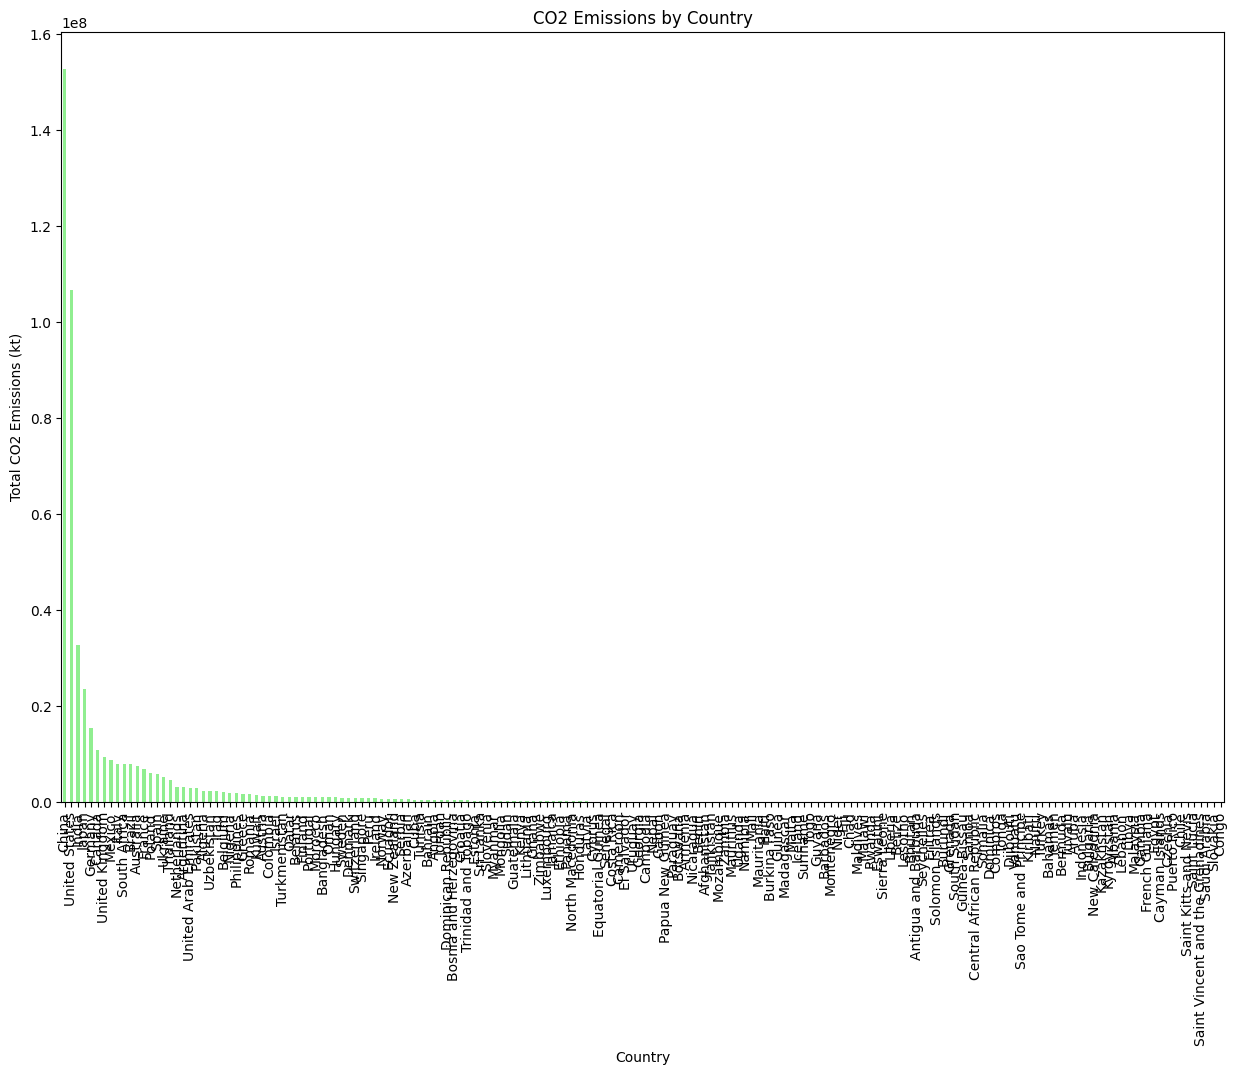

In [16]:
# Visualisation de l'hétérogénéité des émissions de CO2 pour tous les pays

plt.figure(figsize=(15, 10))

co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

co2_emissions_by_country.plot(kind='bar', color='lightgreen')
plt.title('CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=90)
plt.show()


Le graphique illustre clairement l'hétérogénéité des émissions de CO2 parmi les pays de notre jeu de données. On note une concentration très élevée des émissions parmi les premiers pays et une diminution significative à mesure que l'on avance vers les pays moins émetteurs. Cette distribution montre que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2, tandis que de nombreux autres pays contribuent relativement peu à ce total.

Aussi, on constante que certains pays ont une valeur d'émissions en CO2 nulle, pour pouvoir effectuer des calculs de ratio et autre, on distinguera pour la suite les 176 pays de notre jeu de données, parmis lesquels on compte 148 pays aux émissions non nulles.

In [17]:
# Calcul du ratio entre le pays le plus émetteur et le pays le moins émetteur
# Exclure les pays avec des émissions de CO2 égales à 0 avant de calculer le ratio
co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0] # on ne conserve que les pays aux émissions non nulles
max_emissions = co2_emissions.max()
min_emissions = co2_emissions.min()
emissions_ratio = max_emissions / min_emissions

emissions_ratio

print("Ratio entre le pays le plus émetteur et le pays le moins émetteur :", emissions_ratio)


Ratio entre le pays le plus émetteur et le pays le moins émetteur : 288175.1906836442


Interprétation : 

Le ratio des émissions totales de CO2 entre le pays le plus émetteur (Chine) et le pays le moins émetteur (Kyrgyzstan) est d'environ 288 175, mettant en évidence une différence extrême dans les contributions aux émissions globales de CO2. Cela souligne la concentration très élevée des émissions parmi un petit nombre de pays.

Nous rappelons que pour ce calcul, nous avons sélectionné le pays avec la plus petite valeur d'émission de CO2, mais non nulle, parmis les 176 pays.

In [18]:
# Initialiser la somme cumulée des émissions et le compteur de pays
cumulative_emissions = 0
countries_count = 0

# Trier les émissions par ordre croissant
sorted_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sort_values()
total_co2_emissions = co2_emissions_by_country[co2_emissions_by_country > 0].sum()

# Itérer sur les émissions de CO2 des pays pour calculer la somme cumulée
for emissions in sorted_emissions:
    cumulative_emissions += emissions
    countries_count += 1
    if cumulative_emissions / total_co2_emissions > 0.1:
        countries_count -= 1  # Ajuster pour ne pas compter le pays qui dépasse le seuil
        break


nbr_country = data['Entity'].nunique()

print("Nombre total de pays aux émissions non nulles :", nbr_country)
print("")
print("En classant les pays du moins émetteur au plus émetteur ")
print("Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales : ", countries_count)


Nombre total de pays aux émissions non nulles : 148

En classant les pays du moins émetteur au plus émetteur 
Nombre de pays dont la somme des émissions représente moins de 10% des émissions totales :  125


Nous rappelons que sur la liste des 176 pays de notre jeu de données, 148 pays ont des émissions de CO2 non nulles. Ce sont ces 148 pays que nous étudions dans cette partie.

Interprétation :

On classe les 148 pays du moins émetteur en CO2 au plus émetteur. Si on somme les émissions des 125 pays les moins émetteurs de CO2, ces émissions ne dépassent pas 10% de la valeur totale à l'échelle mondiale. On en déduite que 90% des émissions en CO2 proviennent des 23 pays les plus émetteurs d'émissions à l'échelle mondiale.

Si on ramène cela à l'ensemble des pays de notre jeu de données, on obtient que les 147 pays les moins polluants rejettent 10% des émissions de CO2 mondiales.

Nous allons maintenant étudier les 5 pays les plus émetteurs.

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_122240\1419189449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)


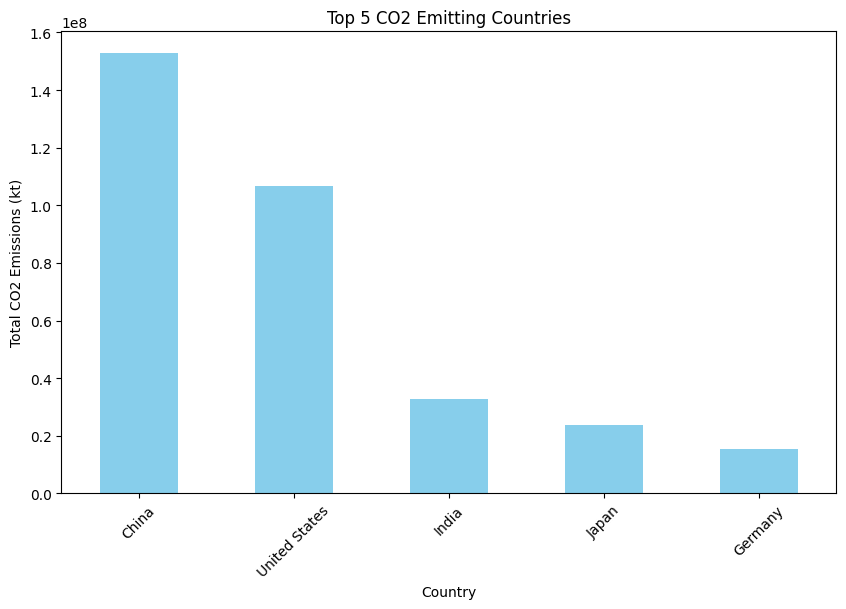

Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: CO2, dtype: float64

In [19]:
# Grouper les données par pays et calculer la somme totale des émissions de CO2 pour chaque pays
co2_emissions_by_country = data.groupby('Entity')['CO2'].sum().sort_values(ascending=False)

# Sélectionner les 5 pays les plus émetteurs de CO2
top_5_co2_emitters = co2_emissions_by_country.head(5)

# Visualisation des 5 plus grands émetteurs de CO2
plt.figure(figsize=(10, 6))
top_5_co2_emitters.plot(kind='bar', color='skyblue')
plt.title('Top 5 CO2 Emitting Countries')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.show()

# Afficher les noms et les valeurs des 5 plus grands émetteurs de CO2
top_5_co2_emitters


In [20]:
# Calculer la somme des émissions des 5 pays les plus émetteurs
sum_top_5_co2_emitters = top_5_co2_emitters.sum()
print("Sommme des émissions des 5 pays les plus émetteurs :",sum_top_5_co2_emitters)
print("")

# Calculer le pourcentage que représente la somme des émissions des 5 pays les plus émetteurs par rapport aux émissions totales
percentage_top_5_co2_emitters = (sum_top_5_co2_emitters / co2_emissions_by_country.sum()) * 100
print("Pourcentage des émissions des 5 pays les plus polluants :", percentage_top_5_co2_emitters)


Sommme des émissions des 5 pays les plus émetteurs : 331150779.70289993

Pourcentage des émissions des 5 pays les plus polluants : 68.39546759559938


La visualisation montre clairement l'hétérogénéité des émissions de CO2 entre les pays, avec les 5 pays les plus émetteurs de CO2 étant :

* Chine avec environ 152 732 800 kt de CO2 émis.
* États-Unis avec environ 106 590 800 kt de CO2 émis.
* Inde avec environ 32 679 580 kt de CO2 émis.
* Japon avec environ 23 674 690 kt de CO2 émis.
* Allemagne avec environ 15 472 890 kt de CO2 émis.

Ces résultats mettent en évidence la grande disparité des contributions aux émissions de CO2 à l'échelle mondiale, avec la Chine et les États-Unis se distinguant nettement comme les plus grands émetteurs. Au total, les émissions des 5 pays les plus polluants représentent 331 150 779 kt de CO2 émis, c'est à dire 68% des émissions totales.

In [21]:
import plotly.express as px

# co2_emissions_by_country = data.groupby('Entity', as_index=False).agg(Total_CO2=('CO2', 'sum'))

# fig = px.choropleth(co2_emissions_by_country,
#                     locations="Entity",
#                     locationmode="country names",
#                     color="Total_CO2",
#                     hover_name="Entity",
#                     hover_data={"Entity": False,  # Cache Entity dans les informations supplémentaires
#                                 "Total_CO2": ":.2f"},  # Formate Total_CO2 avec 2 décimales
#                     color_continuous_scale=px.colors.sequential.Viridis_r,  # '_r' pour inverser le colormap
#                     title="Carte des émissions de CO2 par pays",
#                     labels={'Total_CO2': 'CO2 émis'})

# fig.update_geos(showcountries=True, countrycolor="rgb(255, 255, 255)")
# fig.show()

In [22]:
# On veut maintenant ramener ces chiffres par rapport à la surface et à la densité de population par pays

# Définition des dataframes des pays les plus polluants

df_chn = data.loc[data['Entity'] == 'China']
df_usa = data.loc[data['Entity'] == 'United States']
df_ind = data.loc[data['Entity'] == 'India']
df_jpn = data.loc[data['Entity'] == 'Japan']
df_ger = data.loc[data['Entity'] == 'Germany']

# Calcul des émissions de CO2 par personne

co2_chn = top_5_co2_emitters[0]/(df_chn['Density'].iloc[0]*df_chn['Area'].iloc[0])
co2_usa = top_5_co2_emitters[1]/(df_usa['Density'].iloc[0]*df_usa['Area'].iloc[0])
co2_ind = top_5_co2_emitters[2]/(df_ind['Density'].iloc[0]*df_ind['Area'].iloc[0])
co2_jpn = top_5_co2_emitters[3]/(df_jpn['Density'].iloc[0]*df_jpn['Area'].iloc[0])
co2_ger = top_5_co2_emitters[4]/(df_ger['Density'].iloc[0]*df_ger['Area'].iloc[0])

print("Emissions par habitant en Chine :", co2_chn)
print("Emissions par habitant aux Etats-Unis :",co2_usa)
print("Emissions par habitant en Inde :",co2_ind)
print("Emissions par habitant au Japon :",co2_jpn)
print("Emissions par habitant en Allemagne :",co2_ger)

Emissions par habitant en Chine : 0.10401772194296711
Emissions par habitant aux Etats-Unis : 0.3010982480858295
Emissions par habitant en Inde : 0.021425158040500457
Emissions par habitant au Japon : 0.18052084828479845
Emissions par habitant en Allemagne : 0.18057815827526036


C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_122240\2750436311.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co2_chn = top_5_co2_emitters[0]/(df_chn['Density'].iloc[0]*df_chn['Area'].iloc[0])
C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_122240\2750436311.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co2_usa = top_5_co2_emitters[1]/(df_usa['Density'].iloc[0]*df_usa['Area'].iloc[0])
C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_122240\2750436311.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

In [23]:
# # Grouper les données et calculer le Total_CO2 pour chaque 'Entity'
# co2_emissions_by_country = data.groupby('Entity', as_index=False).agg(
#     Total_CO2=('CO2', 'sum'),
#     Average_Area=('Area', 'mean'),  # Supposant que l'aire peut varier, on prend une moyenne pour simplifier
#     Average_Density=('Density', 'mean')  # Idem pour la densité
# )

# # Calculer le CO2 émis par habitant (ajustement selon votre besoin pour le calcul)
# co2_emissions_by_country['CO2_per_Capita'] = co2_emissions_by_country['Total_CO2'] / (co2_emissions_by_country['Average_Area'] * co2_emissions_by_country['Average_Density'])

# fig = px.choropleth(co2_emissions_by_country,
#                     locations="Entity",
#                     locationmode="country names",
#                     color="CO2_per_Capita",
#                     hover_name="Entity",
#                     hover_data={
#                         "Entity": False,  # Cache 'Entity' dans les informations supplémentaires
#                         "CO2_per_Capita": True,  # Affiche le CO2 émis par habitant
#                         "Total_CO2": True  # Optionnel: affiche également le Total_CO2
#                     },
#                     color_continuous_scale=px.colors.sequential.Viridis_r,  # '_r' pour inverser le colormap
#                     title="Carte des émissions de CO2 par pays par habitant",
#                     labels={'CO2_per_Capita': 'CO2 émis par habitant'})

# fig.update_geos(showcountries=True, countrycolor="rgb(255, 255, 255)")
# fig.show()


Interprétation : (à développer)

On observe que, parmis les 5 pays les plus polluants, le classement est remanié une fois les émissions ramenées à la population. Les Etats-Unis sont le pays avec les émissions par habitant les plus importantes. A l'inverse, l'Inde présente une population très importante, ce qui en fait un pays très polluant. Cependant, ses habitants ont des émissions 15 fois moins importantes que les Américains. 

## 1.3 - Analyse descriptive multidimensionnelle des données

### 1.3.1 - Première visualisation globale


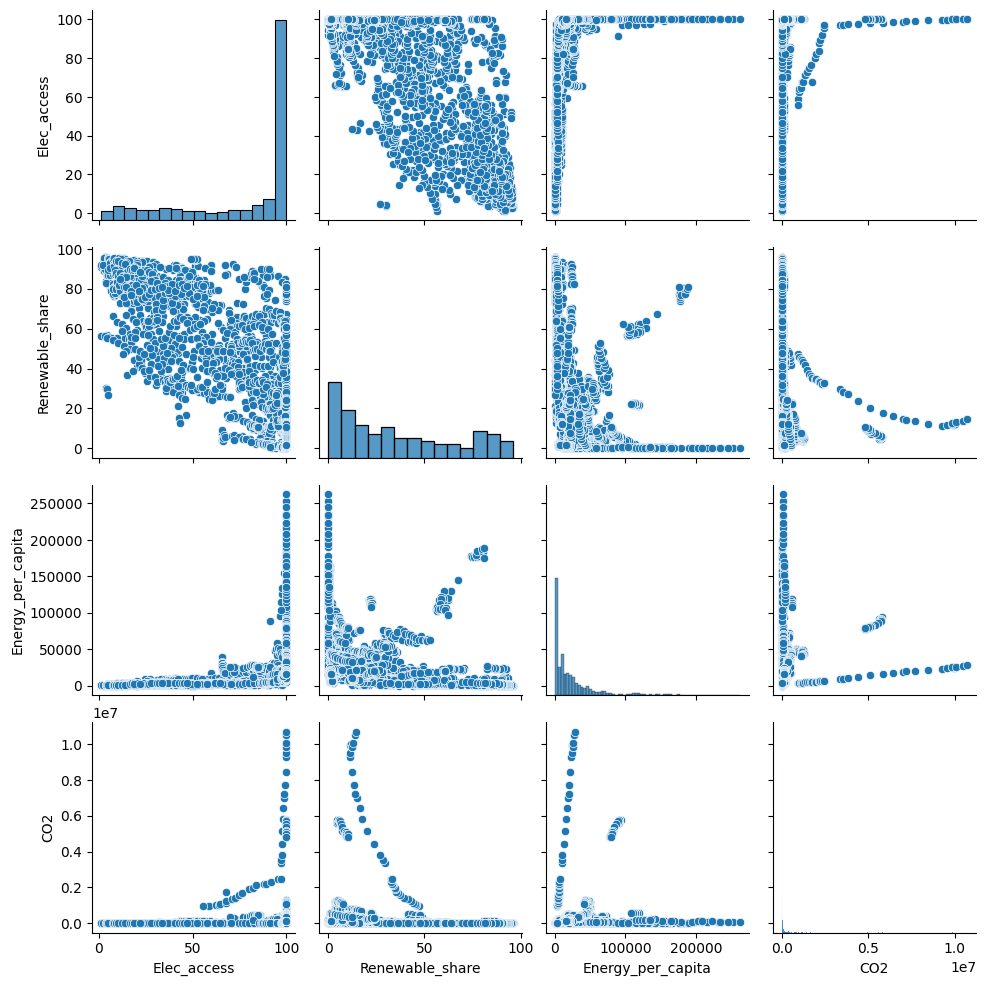

In [24]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Energy_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()


Les graphiques de dispersion analysés révèlent les dynamiques entre quatre variables cruciales de notre ensemble de données : l'accès à l'électricité, la proportion d'énergie renouvelable dans la consommation énergétique finale, la consommation d'énergie primaire par individu, et les émissions de CO2 totales par pays.

Accès à l'électricité par rapport aux autres indicateurs : Une corrélation semble se dessiner, montrant une hausse des émissions de CO2 et de la consommation d'énergie primaire par personne à mesure que l'accès à l'électricité s'élargit. Cela peut suggérer que les pays plus avancées, bénéficiant d'un accès étendu à l'électricité, affichent également une consommation énergétique et des émissions de CO2 plus élevées.

Influence de l'énergie renouvelable sur les émissions de CO2 : Aucune corrélation évidente n'émerge de l'analyse visuelle. Il apparaît que la contribution des énergies renouvelables à la consommation énergétique totale n'est pas directement liée aux émissions de CO2 à l'échelle nationale. Cette observation suggère l'impact potentiel d'autres variables, comme l'efficacité de l'utilisation énergétique, la diversité des sources d'énergie, ou encore l'ampleur de l'activité économique, sur les émissions de CO2.

Consommation d'énergie primaire par individu face aux émissions de CO2 : Un lien positif est observé, indiquant que les pays où la consommation d'énergie primaire par tête est plus importante affichent généralement des niveaux d'émissions de CO2 supérieurs. Cette relation est attendue et peut refléter une intensité économique accrue et une prédominance des combustibles fossiles dans le mix énergétique de ces pays.

Ces interprétations mettent en lumière les interactions entre développement énergétique, utilisation de sources renouvelables, et impact environnemental à travers les émissions de CO2. Elles soulignent l'importance d'approfondir l'analyse pour comprendre les multiples facteurs influençant ces relations et envisager des stratégies d'atténuation des émissions de CO2 tout en promouvant un accès élargi à l'énergie.

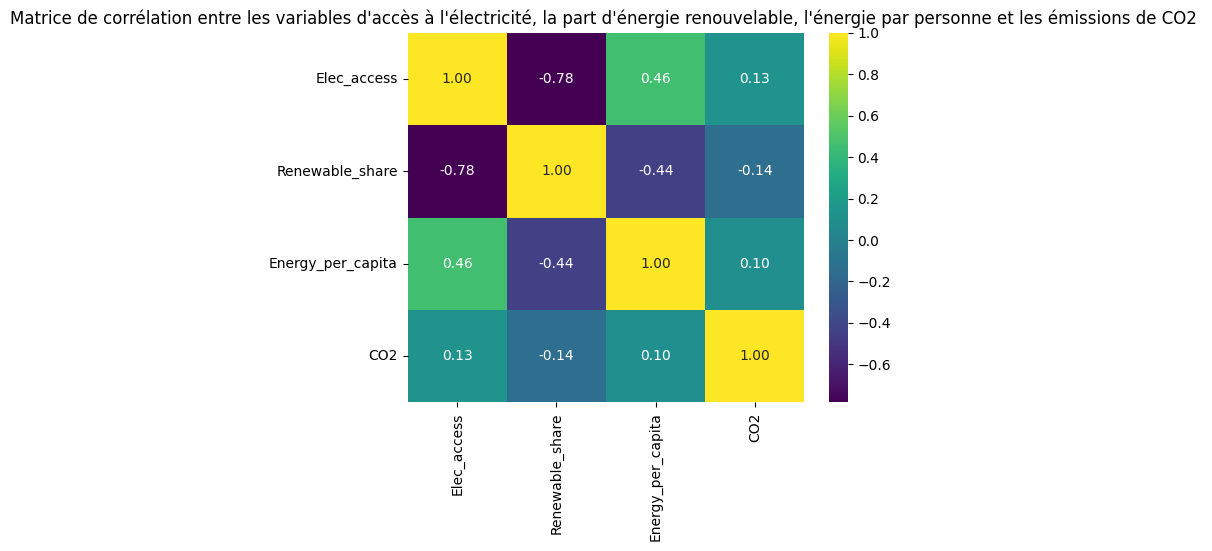

In [25]:
# Calculer le coefficient de corrélation de Pearson entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables d'accès à l'électricité, la part d'énergie renouvelable, l'énergie par personne et les émissions de CO2 ")
plt.show()


Interprétation : 

La matrice de corrélation ci-dessus montre les coefficients de corrélation entre les variables.

Accès à l'électricité : Cette variable ne montre pas de corrélation forte avec les émissions de CO2 ou la part de l'énergie renouvelable, ce qui suggère que l'accès universel à l'électricité peut être atteint indépendamment des niveaux d'émissions de CO2 ou de la part des énergies renouvelables, et ce qui paraît cohérent.

Part de l'énergie renouvelable : La corrélation entre la part de l'énergie renouvelable dans la consommation finale d'énergie et les émissions de CO2 est faible, indiquant que l'augmentation de la part des énergies renouvelables n'est pas directement liée à une réduction des émissions de CO2 au niveau des données analysées. Cela pourrait refléter le fait que d'autres facteurs, tels que l'efficacité énergétique et le mix énergétique global, affectent également les émissions.

Consommation d'énergie primaire par habitant : Il existe une corrélation positive modérée avec les émissions de CO2, ce qui est cohérent avec l'idée que des niveaux de consommation d'énergie plus élevés sont associés à des émissions plus importantes. Cette relation souligne l'importance de l'efficacité énergétique et de la transition vers des sources d'énergie moins carbonées pour réduire les émissions.

Ces résultats montrent les relations entre l'accès à l'électricité, la part des énergies renouvelables, la consommation d'énergie et les émissions de CO2. Ils suggèrent que, bien que l'augmentation de la part des énergies renouvelables soit importante pour un avenir durable, des efforts supplémentaires en matière d'efficacité énergétique et de réduction de la consommation d'énergie sont nécessaires pour atteindre une réduction significative des émissions de CO2. 

Nous allons vérifier cette hypothèse en étudiant les corrélations entre d'autres variables.

### 1.3.2 - Etude de la corrélation entre les énergies fossiles et les émissions de CO2

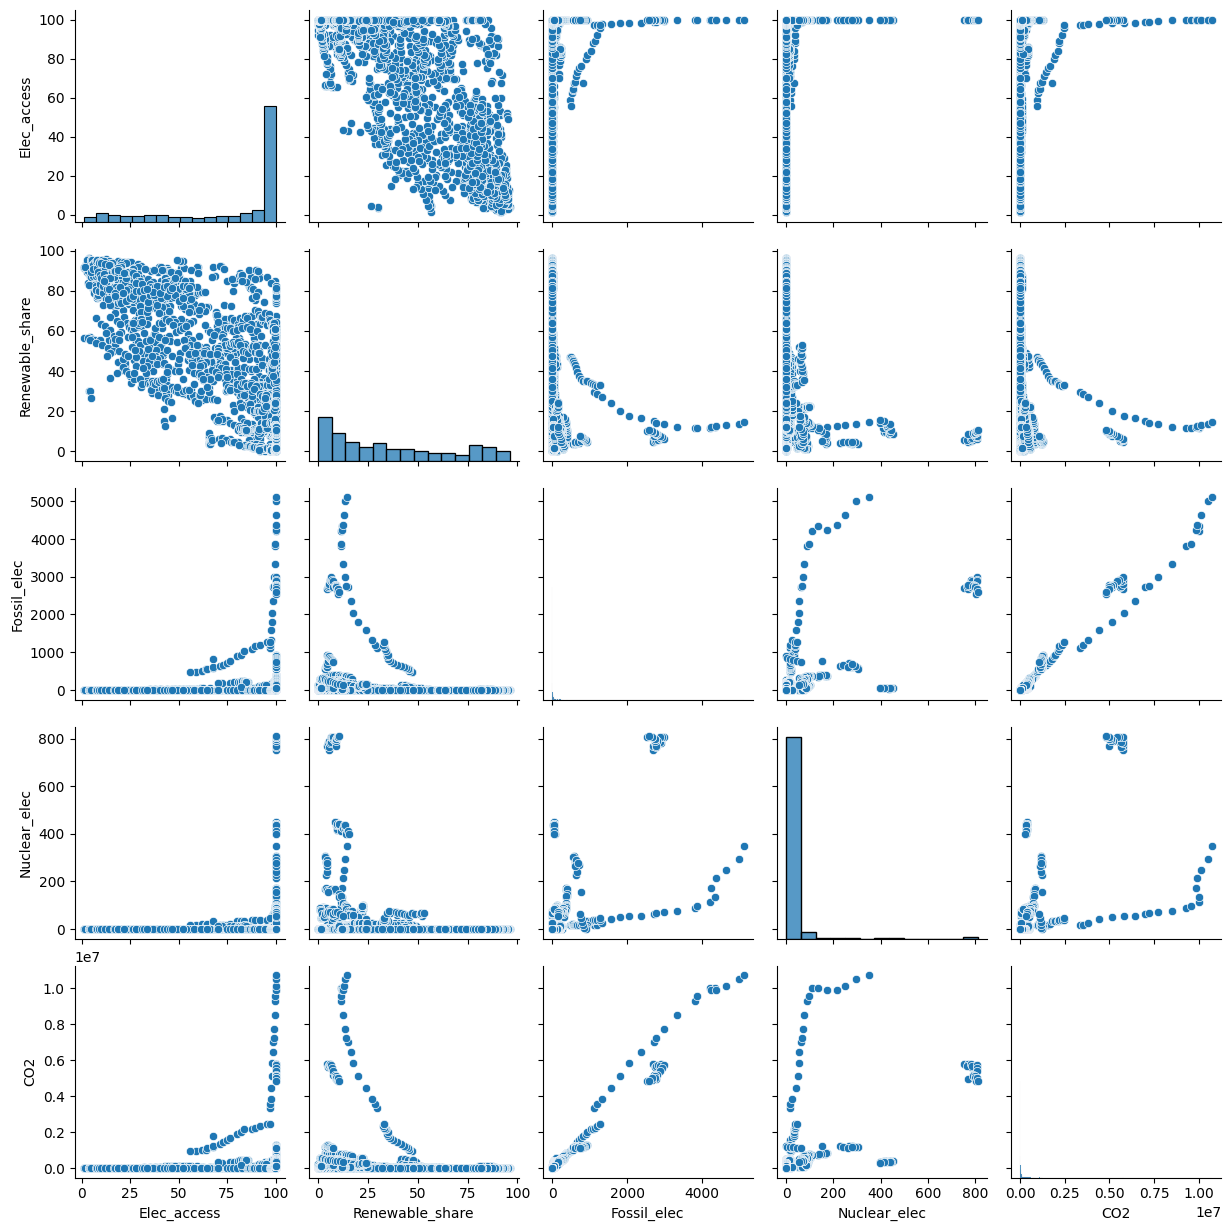

In [26]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Elec_access',
    'Renewable_share',
    'Fossil_elec',
    'Nuclear_elec',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()

Ces observations mettent en évidence les interrelations complexes entre l'accès à l'électricité, les choix énergétiques des pays, et leurs impacts sur les émissions de CO2. Une stratégie globale pour réduire les émissions de CO2 devra probablement prendre en compte ces différents aspects pour être efficace.

Accès à l'électricité : Les pays bénéficiant d'un accès élargi à l'électricité affichent souvent une consommation accrue d'énergie, notamment d'origine fossile et nucléaire, accompagnée de niveaux supérieurs d'émissions de CO2. Cette tendance souligne la corrélation entre le développement économique et l'intensification de la consommation énergétique.

Influence des énergies renouvelables : La proportion des énergies renouvelables dans le mix énergétique varie considérablement d'un pays à l'autre, sans montrer de corrélation directe avec la consommation d'énergies fossiles ou nucléaires ni avec les émissions de CO2. Cela suggère que les pays déploient des stratégies énergétiques variées, reflétant peut-être des priorités ou des contraintes environnementales et économiques différentes.

Production d'électricité à partir de combustibles fossiles : Une corrélation positive est observée entre la production d'électricité issue de combustibles fossiles et les niveaux d'émissions de CO2. Cet état de fait est logique, la combustion de combustibles fossiles étant une importante source d'émissions de CO2.

Production d'électricité nucléaire : Bien que certains pays disposent d'une capacité notable de production d'électricité nucléaire, cette dernière ne paraît pas liée de manière directe à une réduction ou une augmentation des émissions de CO2. L'énergie nucléaire, ne générant pas de CO2 lors de la production d'électricité, les variations observées dans les émissions des pays pourraient être attribuées à d'autres aspects de leur mix énergétique ou de leur activité économique.

Émissions de CO2 : Les émissions plus conséquentes de CO2 sont généralement associées à une utilisation élevée d'énergie, qu'elle provienne de sources fossiles ou nucléaires. Ceci met en lumière l'importance de considérer à la fois l'efficacité énergétique et la diversification des sources d'énergie dans les stratégies visant à réduire les émissions de gaz à effet de serre.

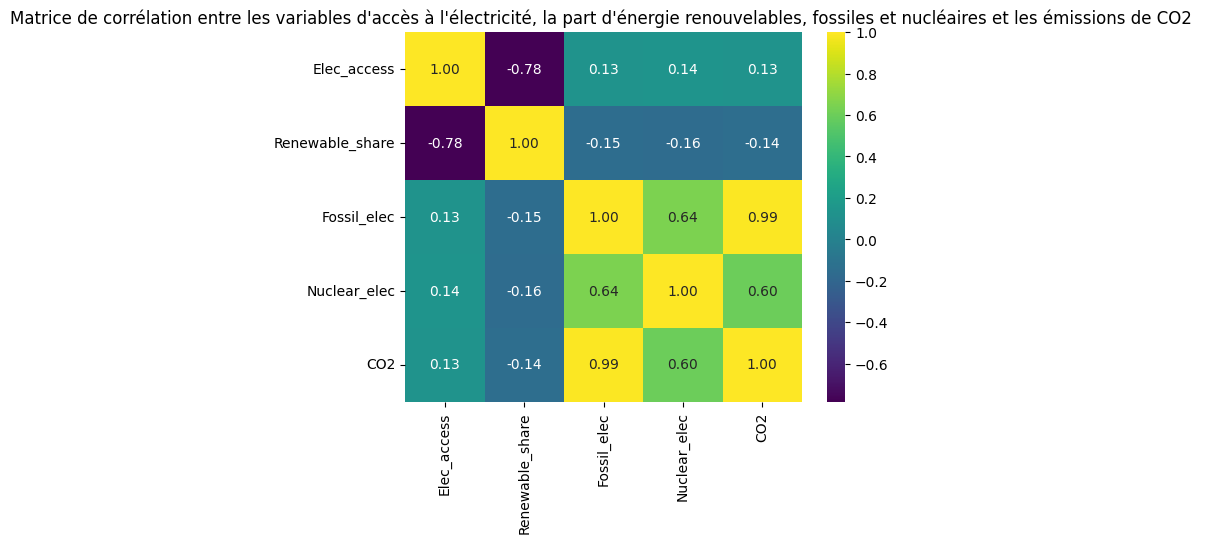

In [27]:
# Calculer le coefficient de corrélation entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables d'accès à l'électricité, la part d'énergie renouvelables, fossiles et nucléaires et les émissions de CO2 ")
plt.show()


Interprétation : 

La matrice de corrélation montre les relations entre l'accès à l'électricité, la part des énergies renouvelables, et l'utilisation d'énergie fossile et nucléaire avec les émissions de CO2. On observe : 

Relation entre l'accès à l'électricité et les énergies renouvelables : Une corrélation négative prononcée indique que les pays ayant un accès généralisé à l'électricité tendent à présenter une part moindre d'énergies renouvelables dans leur mix énergétique. Cette observation suggère que les nations largement électrifiées pourraient s'appuyer davantage sur des sources d'énergie non renouvelables.

Lien entre la consommation d'énergie fossile et les émissions de CO2 : Une corrélation très marquée révèle que l'augmentation de la consommation d'énergie fossile est directement liée à une hausse des émissions de CO2. Cette forte corrélation souligne le rôle critique de l'énergie fossile dans le bilan carbone, indépendamment des autres composantes du mix énergétique.

Corrélation entre les énergies renouvelables et les émissions de CO2 : Une légère corrélation négative entre ces deux variables peut suggérer que l'accroissement de la part des énergies renouvelables n'entraîne pas automatiquement une réduction proportionnelle des émissions de CO2 au niveau global. Cela pourrait refléter l'usage simultané de combustibles fossiles même dans les contextes où les énergies renouvelables sont promues.

Cette matrice des corrélations souligne le rôle majeur et prépondérant des combustibles fossiles dans les émissions de CO2 et suggère que les politiques en faveur des énergies renouvelables pourraient ne pas avoir un impact immédiat sur les émissions de CO2 sans autres changements dans le mix énergétique et l'efficacité énergétique.

De plus, cette analyse confirme les hypothèses émises dans la première visualisation globale.



### 1.3.3 - Etude de l'influence économique et démographique

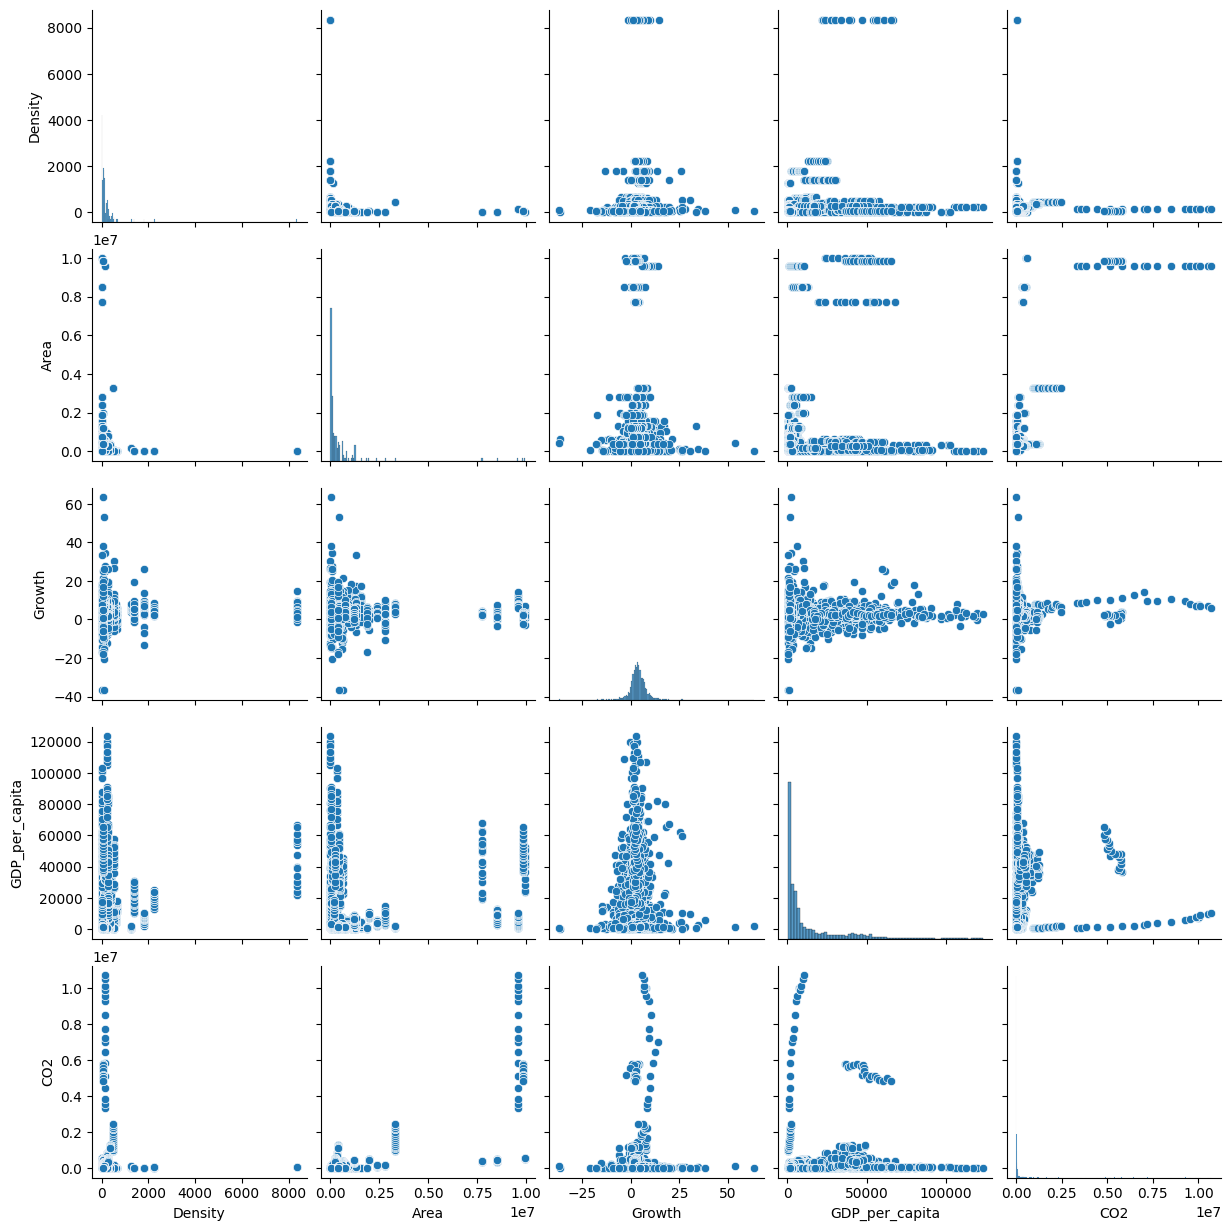

In [28]:
# Sélectionner quelques variables clés pour l'analyse
variables_to_analyze = [
    'Density',
    'Area',
    'Growth',
    'GDP_per_capita',
    'CO2'
]

# Créer des scatter plots pour chaque paire de variables
sns.pairplot(data[variables_to_analyze])
plt.show()

Interprétation : 

* Densité de population (Density) : Il n'y a pas de tendance claire indiquant une relation directe entre la densité de population et les autres variables. Il y a cependant quelques valeurs extrêmes, ce qui indique que certains pays ou régions ont des densités de population très élevées.

* Superficie (Area) : La superficie ne semble pas être directement liée à la croissance économique (Growth), au PIB par habitant (GDP_per_capita), ou aux émissions de CO2. Les données semblent être assez dispersées, ce qui suggère que la taille d'un pays n'est pas un facteur déterminant pour ces indicateurs.

* Croissance économique (Growth) : La croissance économique présente une variabilité importante parmi les pays, sans une relation évidente avec le PIB par habitant ou les émissions de CO2. 

* PIB par habitant (GDP_per_capita) : Le PIB par habitant montre un certain regroupement vers les valeurs inférieures, avec quelques valeurs extrêmes indiquant que certains pays ont un PIB par habitant beaucoup plus élevé. Il y a également une dispersion des points lorsque le PIB par habitant est comparé aux émissions de CO2, suggérant que la richesse d'un pays ne se traduit pas toujours par des émissions de CO2 proportionnellement plus élevées.

* Émissions de CO2 (CO2) : Les émissions de CO2 sont concentrées vers les valeurs inférieures avec quelques valeurs extrêmes, indiquant que quelques pays sont responsables d'une part disproportionnée des émissions globales de CO2. Il n'y a pas de relation claire et linéaire visible entre les émissions de CO2 et les autres variables dans ces scatter plots.

En conclusion, ces visualisations illustrent les relations entre les indicateurs démographiques, économiques et environnementaux. Les données suggèrent que des facteurs autres que la densité de population, la taille du pays, et la richesse économique influencent les émissions de CO2. Ces résultats peuvent servir de point de départ pour des analyses statistiques plus poussées et la modélisation prédictive.

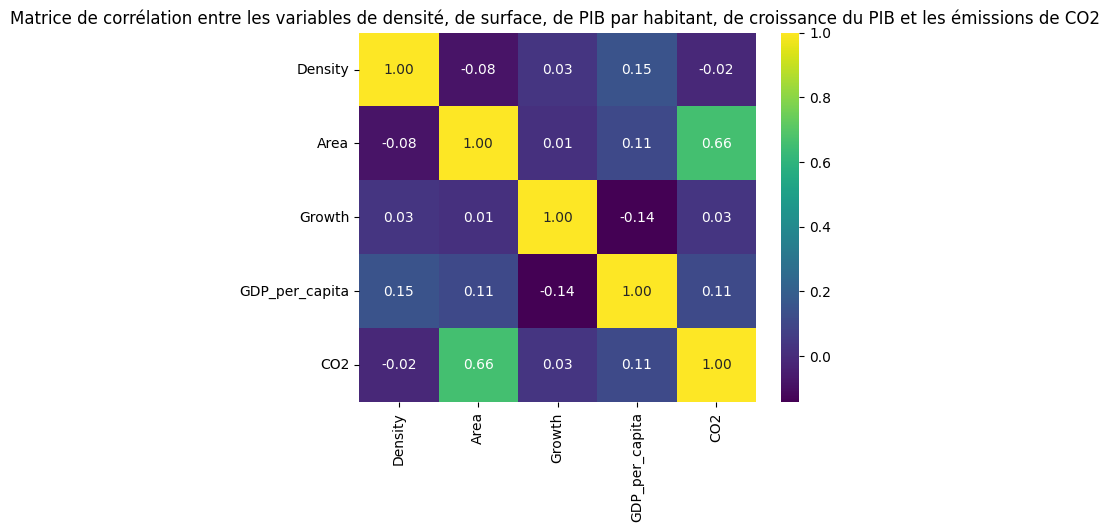

In [29]:
# Calculer le coefficient de corrélation entre les variables sélectionnées
correlation_matrix = data[variables_to_analyze].corr()

# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matrice de corrélation entre les variables de densité, de surface, de PIB par habitant, de croissance du PIB et les émissions de CO2 ")
plt.show()

Interprétation : 

La matrice de corrélation indique les relations entre la densité de population, la superficie du pays, le PIB par habitant, la croissance du PIB et les émissions de CO2 :

* Densité vs. Superficie : Une corrélation négative (-0.15) suggère que les pays de plus grande superficie ont tendance à avoir une densité de population plus faible. Ce qui est cohérent.

* Densité vs. Émissions de CO2 : Une corrélation très faible (0.04) indique qu'il n'y a pas de lien direct entre la densité de la population et les émissions de CO2.

* Superficie vs. Émissions de CO2 : Une corrélation modérée (0.66) suggère que les pays avec de plus grandes superficies ont tendance à avoir des émissions de CO2 plus élevées, ce qui pourrait refléter une activité économique et industrielle plus importante ou une plus grande utilisation de véhicules et d'énergie.

* Croissance du PIB vs. PIB par habitant : Une corrélation négative (-0.14) montre qu'une croissance économique plus élevée n'est pas nécessairement associée à un PIB par habitant plus élevé, ce qui peut se produire dans les économies en développement.

* PIB par habitant vs. Émissions de CO2 : Une corrélation positive faible (0.11) indique que les pays plus riches pourraient avoir légèrement plus d'émissions de CO2, mais la relation n'est pas forte, ce qui implique que la richesse n'est pas un prédicteur direct des émissions de CO2.

* Superficie vs. PIB par habitant : Une corrélation positive faible (0.11) indique que les pays plus grands ont tendance à avoir un PIB par habitant légèrement plus élevé.

En résumé, cette matrice montre que si certaines variables ont une relation modérée, beaucoup n'ont qu'une faible ou pas de corrélation directe. Cela suggère que des facteurs supplémentaires pourraient influencer ces relations et confirme les observations précédentes.

## 1.4 - Analyse en Composantes Principales (ACP)

Dans cette partie, nous allons procéder à une Analyse en Composantes Principales (ACP). L'objectif de cette méthode est de synthétiser les variables du jeu de donbnées initial en un nombre limité de composantes principales, tout en conservant un maximun d'informations. Initialement, nous avons 18 variables après traitement, qui correspondent aux 18 caractéristiques. Nous allons étudier s'il est possible de réduire cette dimension, tout en conservant un maximum d'information.

### 1.4.1 - Reformatage des données

In [30]:
# Pour l'ACP, on ne garde que les variables quantitatives
data_quanti = data.iloc[:, 2:18].copy()
data_quanti.head()

,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
3,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


L'ACP est sensible à la variabilité des données. Si les variables sont mesurées dans des unités différentes ou ont des variances différentes, celles avec une plus grande variance ou des unités plus grandes pourraient dominer les premières composantes principales. En centrant et réduisant, chaque variable contribue également à l'analyse sans être influencée par l'échelle de mesure. Nous décidons donc de centrer et réduire nos données avant de réaliser notre ACP.

In [31]:
# Initialisation du StandardScaler
scaler = StandardScaler()

# Centrer et réduire les données
data_quanti_scaled = scaler.fit_transform(data_quanti)

# Convertir de nouveau en DataFrame pour garder le format DataFrame
data_quanti_scaled = pd.DataFrame(data_quanti_scaled, columns=data_quanti.columns)

# Afficher les premières lignes pour vérifier
data_quanti_scaled.head()


,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,-1.963065,-1.342539,0.028580,-0.204041,-0.194725,-0.241340,0.795146,-0.697002,-1.123384,-0.204918,1.062898,-0.661410,-0.226635,-0.003482,0.633961,0.836135
1,-1.793997,-1.306853,0.281088,-0.203987,-0.194725,-0.241990,0.676131,-0.697696,-1.179300,-0.205151,-0.534190,-0.660305,-0.226635,-0.003482,0.633961,0.836135
2,-1.624946,-1.273717,-0.064029,-0.203961,-0.194725,-0.241712,0.691211,-0.696406,-1.120588,-0.204515,1.579053,-0.658668,-0.226635,-0.003482,0.633961,0.836135
3,-1.455836,-1.231659,-0.130321,-0.204335,-0.194725,-0.241247,1.061314,-0.694995,-1.095426,-0.204258,0.314777,-0.657509,-0.226635,-0.003482,0.633961,0.836135
4,-1.286582,-1.194699,-0.233923,-0.204335,-0.194725,-0.240225,1.141343,-0.693650,-1.087039,-0.204246,2.138087,-0.652385,-0.226635,-0.003482,0.633961,0.836135


### 1.4.2 - Analyse en Composantes Principales (ACP)

In [32]:
pca = PCA(10)  # projection from 18 to 10 dimensions
projected = pca.fit_transform(data_quanti_scaled)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x+1) for x in range(10)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,4.507058,28.0,28.0
1,Dim2,3.236081,20.0,48.0
2,Dim3,1.441173,9.0,57.0
3,Dim4,1.319614,8.0,66.0
4,Dim5,1.041972,7.0,72.0
5,Dim6,0.908189,6.0,78.0
6,Dim7,0.837415,5.0,83.0
7,Dim8,0.695814,4.0,87.0
8,Dim9,0.576517,4.0,91.0
9,Dim10,0.528380,3.0,94.0


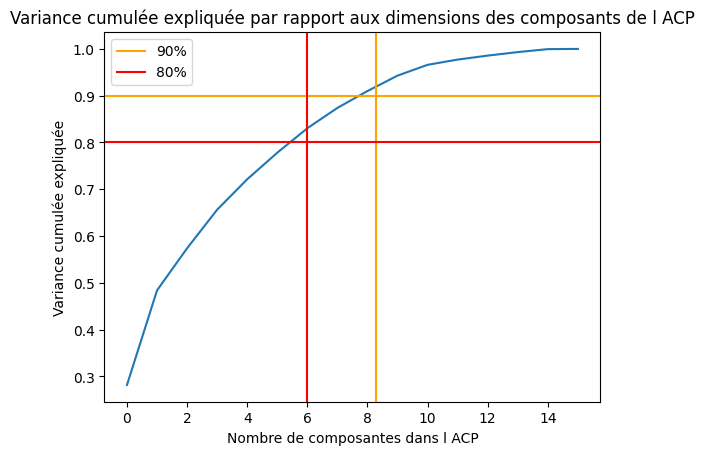

In [33]:
pca = PCA().fit(data_quanti_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.axvline(x=8.3,color='orange', label='90%')
plt.axhline(y=0.9,color='orange')

plt.axvline(x=6,color='red', label='80%')
plt.axhline(y=0.8,color='red')

plt.title('Variance cumulée expliquée par rapport aux dimensions des composants de l ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée') 
plt.legend()
plt.show()

Interprétation :

* Dans un premier temps, le tableau nous présente la varianxce expliquée pour chaque dimension, ainsi que le pourcentage que cela représente. La dernière colonne nous donne les pourcentages de variances cumulées. En général, on peut se satisfaire de dimension représentant 80% de la variance cumulée. Ici, cela reviendrait à garder 7 composantes principales. Si on souhaite plus de précision, avec 90% de la variance cumulée, on peut alors garder 9 composantes principales. Cependant, on observe que les 2 premières composantes portent beaucoup d'information (48% de la variance cumulée), cela montre que ces 2 composantes portent à elles-seules la moitié de information.

* Le graphique nous permet de vérifier ces observations. On remarque qu'à partir d'un certain seuil (environ 90%), il faut rajouter beaucoup de composantes dans l'ACP pour gagner de l'information sur la variance cumulée.

On décide dans un premier temps de conserver les 7 premières composantes principales, pour suivre les recommendations du cours.

### 1.4.3 - Etude des composantes principales

Nous allons construire un nouveau dataframe avec les 7 premiers composantes de l'ACP. Comme présenté ci-dessus, cela nous permeter d'expliquer 80% de la variance.

In [34]:
# Transformation en DataFrame des résultats de l'ACP
data_pca = pd.DataFrame({
    "Dim1" : projected[:,0], 
    "Dim2" : projected[:,1],
    "Dim3" : projected[:,2],
    "Dim4" : projected[:,3],
    "Dim5" : projected[:,4],
    "Dim6" : projected[:,5],
    "Dim7" : projected[:,6],
   
})

# Résultat (premières lignes)
data_pca.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7
0,-1.674838,1.041583,0.348928,-0.035604,-0.144750,1.753036,-0.472937
1,-1.594912,0.909138,-0.270650,0.043042,0.604664,0.939527,-1.374460
2,-1.530935,0.914397,0.520290,-0.194424,-0.464908,2.010033,-0.171900
3,-1.410927,0.787687,-0.083569,0.076535,0.126966,1.481013,-0.817930
4,-1.406894,0.843197,0.558475,-0.041392,-0.746621,2.472079,0.230935


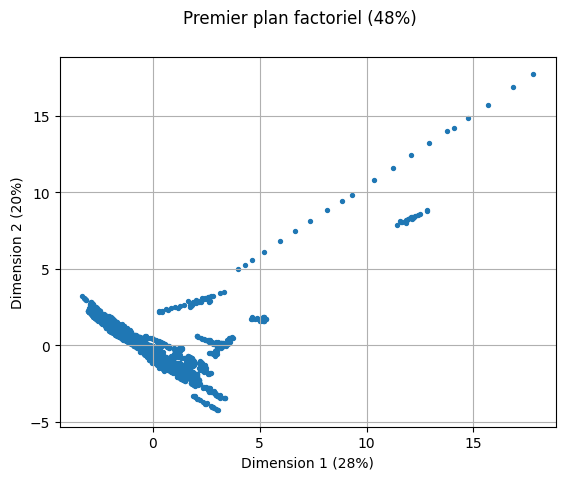

In [35]:
# Affichage de la répartition des données en fonction des 2 premières dimensions

data_pca.plot.scatter("Dim1", "Dim2",s=8) # nuage de points
plt.xlabel("Dimension 1 (28%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (20%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (48%)") # titre général
plt.grid()
plt.show()

Interprétation : 

* Axes : L'axe horizontal (Dim 1) représente la première composante principale, et l'axe vertical (Dim 2) représente la deuxième composante principale. Ces deux axes rerésentent la plus grande partie de la variance dans nos données, avec 28% pour la Dimension 1 et 20% pour la Dimension 2, cumulant à 48% de la variance totale.

* Dispersion des Points : Chaque point représente une observation dans l'espace des composantes principales. La dispersion des points montre la distribution des observations en fonction de ces deux principales dimensions de variance.

Interprétation des Composantes :

* La dimension 1 semble capturer une variance significative, comme indiqué par le pourcentage (33%). Si cette composante est fortement corrélée avec certaines variables, cela indiquerait que ces variables sont des facteurs significatifs de variation dans nos données.

* La dimension 2 capture moins de variance (18%) mais peut représenter un autre aspect des données qui est orthogonale (donc indépendante) à la dimension 1.

Regroupements et tendances : Les groupes de points qui apparaissent sur le graphique peuvent indiquer des similitudes entre les observations. Par exemple, le grand groupe de points en bas à gauche pourrait représenter des observations avec des caractéristiques communes qui les distinguent des observations représentées par les points dispersés le long de la dimension 1.

Outliers : Des points éloignés des autres peuvent être des outliers qui ont des propriétés très différentes des observations typiques ou qui pourraient être des erreurs de mesure ou de saisie, ou encore des valeurs incohérentes avec les autres.

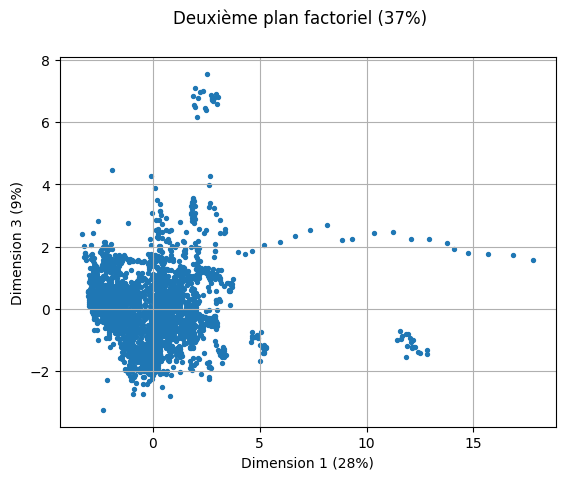

In [36]:
# Affichage de la répartition des données en fonction de Dim 1 et Dim 3

data_pca.plot.scatter("Dim1", "Dim3", s=8) # nuage de points
plt.xlabel("Dimension 1 (28%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9%)") # idem pour axe Y
plt.suptitle("Deuxième plan factoriel (37%)") # titre général
plt.grid()
plt.show()

Interprétation : 

Dans la continuité du raisonnement conduit sur le premier plan factoriel, nous allons analyser celui entre la première dimension et la troisème dimension de l'ACP.

* Dispersion : La dispersion des points indique la variation des observations selon ces deux dimensions de l'ACP. La plupart des observations sont concentrées vers le centre du graphique, suggérant que pour ces deux composantes, beaucoup d'observations ont des scores similaires.

* Patterns et groupes : Bien que les points soient largement dispersés, il n'y a pas de groupes distincts visibles dans cette vue. Cependant, on remarque un ensemble de points qui s'étendent le long de la dimension 1, indiquant une caractéristique qui varie de manière significative parmi ces observations.

* Outliers : Il y a quelques points qui se détachent loin du centre, en particulier le long de la dimension 1. Ces observations peuvent être très différentes du reste des données.

* Cumul de variance : Les deux dimensions affichées représentent ensemble 36% de la variance totale des données. Cela signifie que bien que ces deux composantes apportent des informations significatives sur les données, il reste encore beaucoup de variance à expliquer par d'autres composantes ou dimensions.

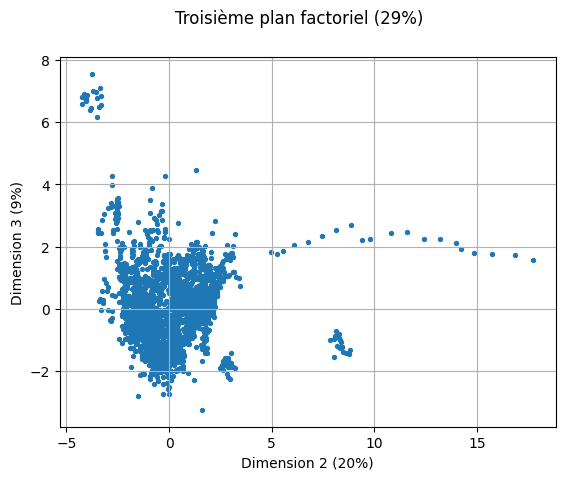

In [37]:
# Affichage de la répartition des données en fonction de Dim 2 et Dim 3

data_pca.plot.scatter("Dim2", "Dim3",s=8) # nuage de points
plt.xlabel("Dimension 2 (20%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9%)") # idem pour axe Y
plt.suptitle("Troisième plan factoriel (29%)") # titre général
plt.grid()
plt.show()

Interprétation :

* Dispersion des points: La majorité des observations sont groupées autour du centre du graphique, mais il existe également un nombre significatif de points qui s'étendent loin du centre le long de la deuxième composante principale. Cela suggère qu'il y a une variable ou un ensemble de variables qui contribuent significativement à la variance dans la deuxième dimension.

* Distribution: Il y a une concentration de données autour de l'origine et une queue qui s'étend vers la droite le long de la deuxième dimension. Cela peut indiquer une distribution asymétrique des données pour les variables qui chargent fortement sur cette composante.

* Potentiels outliers: Des points éloignés des autres peuvent être identifiés comme des outliers. Ces observations pourraient représenter des cas extrêmes ou des situations particulières qui se démarquent du reste de l'ensemble des données.

### 1.4.4 - Etude des chargements 

Pour déterminer quelles variables contribuent le plus à chaque composante principale dans une Analyse en Composantes Principales (ACP), nous pouvons examiner les "chargements" des composantes. Les chargements sont des coefficients qui indiquent comment chaque variable est représentée sur chacune des composantes principales. 

In [38]:
# Les chargements sont dans pca.components_
pca = PCA(7).fit(data_quanti_scaled)
loadings = pca.components_.T  # Transposée pour aligner avec les variables originales

# Créer un DataFrame pour une meilleure lisibilité
loadings_df = pd.DataFrame(loadings, index=data_quanti_scaled.columns, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7'])

# Afficher les chargements pour les 7 premières composantes
loadings_df

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7
Elec_access,0.321698,-0.301490,-0.142321,-0.105792,-0.139283,0.094532,0.064228
Clean_access,0.330341,-0.323303,-0.116380,0.000299,-0.095605,0.014480,0.067346
Renewable_share,-0.307658,0.298239,-0.012133,0.329152,0.135596,0.070232,0.019202
Fossil_elec,0.331328,0.355444,0.061879,-0.116163,0.001937,0.006409,-0.086001
Nuclear_elec,0.286933,0.217655,-0.093350,0.098842,0.090347,-0.026052,-0.017173
Renewable_elec,0.318827,0.339641,-0.022620,-0.005339,0.032840,0.065226,0.024695
Low_carb_elec,-0.081432,0.137022,-0.289363,0.589402,0.145331,0.372936,0.136090
Energy_per_capita,0.274351,-0.230154,0.285856,0.342682,0.121468,-0.197999,0.188783
PEnergy_intensity,-0.060368,0.132005,0.342921,0.368716,-0.386737,-0.615760,0.085917
CO2,0.327135,0.361533,0.063745,-0.114615,-0.017291,0.013527,-0.074899


Interprétation : 

Le tableau des chargements illustre la façon dont chaque variable contribue à chacune des sept premières dimensions de l'ACP. 

* La première dimension semble être influencée positivement par Elec_access, Clean_access, Fossil_elec, Nuclear_elec, Renewable_elec, et les émissions de CO2, ce qui suggère que cette dimension capture un mélange de l'accès à l'électricité, la consommation d'énergie à partir de différentes sources et les émissions associées. Cette dimension représente probablement la consommation énergétique du pays : une composante élevée correspondrait à une forte production et consommation énergétique.

* La dimension 2 montre une forte contribution positive de Fossil_elec et Renewable_elec, indiquant que cette dimension peut représenter l'équilibre entre les sources d'énergie renouvelables et fossiles dans la production d'électricité des pays. Cette dimension est influencée négativement par la variable Elec_access. On peut supposer que la deuxième dimension présente la différence entre les capacités de production d'un mix énergétique et l'accès à l'électricité pour la population.

* La troisième composante principale est fortement influencée par Low_carb_elec et Energy_per_capita, ce qui pourrait indiquer que cette dimension reflète des aspects de la consommation d'énergie à faible teneur en carbone et par habitant.

* Dimension 4 : Les variables Low_carb_elec et Energy_per_capita ont des chargements relativement élevés mais de signes opposés, ce qui pourrait signifier que cette composante distingue les pays avec une consommation d'énergie par personne élevée mais ayant une faible part d'énergie à faible teneur en carbone, des pays avec une situation inverse. 

* Dimension 5 : On observe une forte charge négative importante pour la densité et le PIB par habitant. Cette dimension pourrait capturer la densité d'un pays : un petit pays avec une orte densité aurait une valeur élevée sur cette dimension. 

* Dimension 6 : Growth et GDP_per_capita présentent des chargements positifs significatifs, ce qui suggère que cette dimension peut refléter le niveau de développement économique et la croissance. Cela peut indiquer que les pays avec une croissance économique forte et un PIB par habitant élevé se distinguent des autres sur cette dimension. De plus, la variable PEnergy_intensity est assez négative, ce qui est cohérent avec l'analyse. 

* Dimension 7 : Longitude a un chargement négatif considérable, ce qui peut indiquer que cette composante reflète des différences géographiques ou régionales dans les données. Cela pourrait être lié à la position longitudinale des pays et à des facteurs environnementaux ou économiques qui varient d'est en ouest.

Les composantes avec des contributions élevées de Elec_access, Clean_access, et Energy_per_capita pourraient être interprétées comme des indicateurs de développement et de consommation d'énergie. Les composantes où Fossil_elec, Nuclear_elec, et Renewable_elec chargent fortement pourraient refléter la stratégie énergétique et la mixité des sources d'énergie des pays. Les dimensions où les émissions de CO2 ont des chargements élevés sont probablement liées à l'impact environnemental et pourraient être interprétées dans le contexte des objectifs de durabilité et de réduction des émissions.

Ces interprétations sont mises en avant de ma nière plus visuelle avec la matrice ci-dessous.

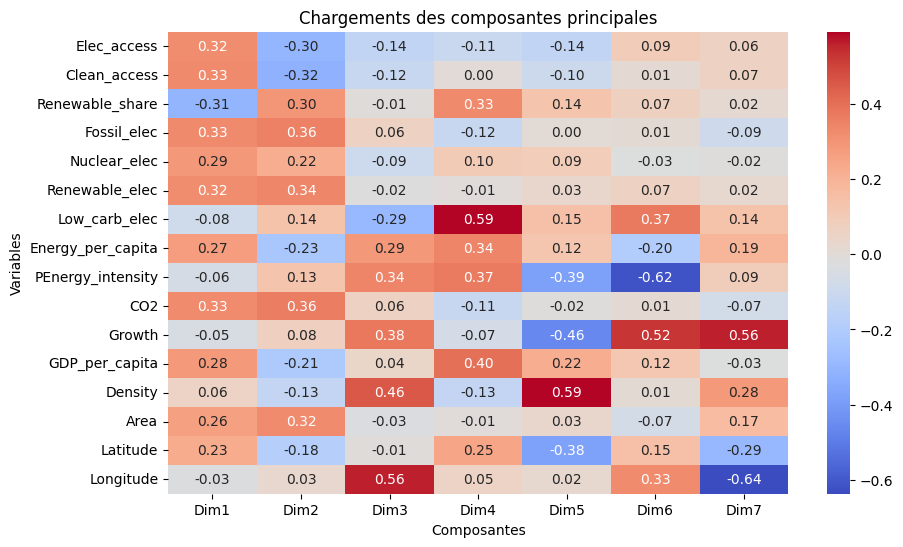

In [39]:
# Représentation du tableau sous forme de matrice
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Chargements des composantes principales')
plt.xlabel('Composantes')
plt.ylabel('Variables')
plt.show()

## 1.5 - Dépendance de la variable Year et de la variable présentant les émissions de CO2

In [40]:
data_ = data.iloc[:, :-4].copy()
data_.head()

,Entity,Year,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


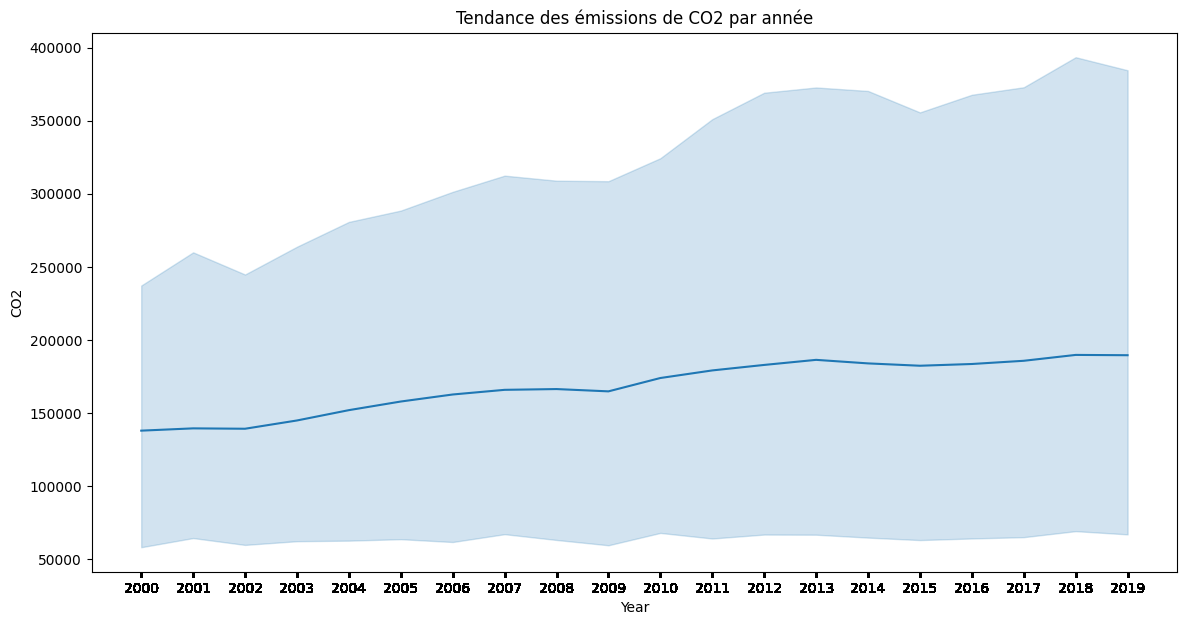

In [41]:
# Graphique de série temporelle
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_, x='Year', y='CO2')
plt.title('Tendance des émissions de CO2 par année')
plt.xticks(data_['Year'].astype(int))
plt.show()

Interprétation : 

* Tendance générale : La ligne représente la tendance moyenne des émissions de CO2 sur la période donnée. On observe que les émissions de CO2 ont globalement augmenté au fil du temps depuis l'an 2000 jusqu'à environ 2010. Après 2010, la tendance semble plus stable avec une légère augmentation ou stabilisation des émissions.

* Variation annuelle : La zone ombrée qui s'étend au-dessus et en dessous de la ligne de tendance indique la variation des émissions de CO2 au sein de chaque année. La largeur de cette zone peut signifier l'écart-type, indiquant la variabilité des émissions de CO2 d'une année à l'autre. Une zone large suggère une grande variabilité, tandis qu'une zone étroite indique une plus grande constance dans les émissions au cours de l'année. On remarque que la largeur de cette zone augmente au fur et à mesure du temps. 

* Pointes et chutes : Certaines années montrent des pointes ou des chutes dans les émissions, comme la pointe autour de 2010. Ces fluctuations pourraient être dues à des événements spécifiques ou à des changements dans les politiques environnementales, les pratiques économiques ou les technologies énergétiques.

* Analyse contextuelle : Pour comprendre pleinement ce graphique, il est important de le mettre en contexte avec d'autres données et événements. Par exemple, des augmentations dans les émissions de CO2 pourraient coïncider avec la croissance économique, tandis que des stabilisations ou des réductions pourraient refléter des améliorations dans l'efficacité énergétique ou l'adoption d'énergies renouvelables.

En résumé, ce graphique indique que, bien que les émissions de CO2 ont augmenté jusqu'à 2010, il y a eu une tendance vers la stabilisation ou une augmentation plus modérée dans les années suivantes. Cela pourrait être interprété comme un signe positif dans le contexte des efforts mondiaux de réduction des émissions.

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


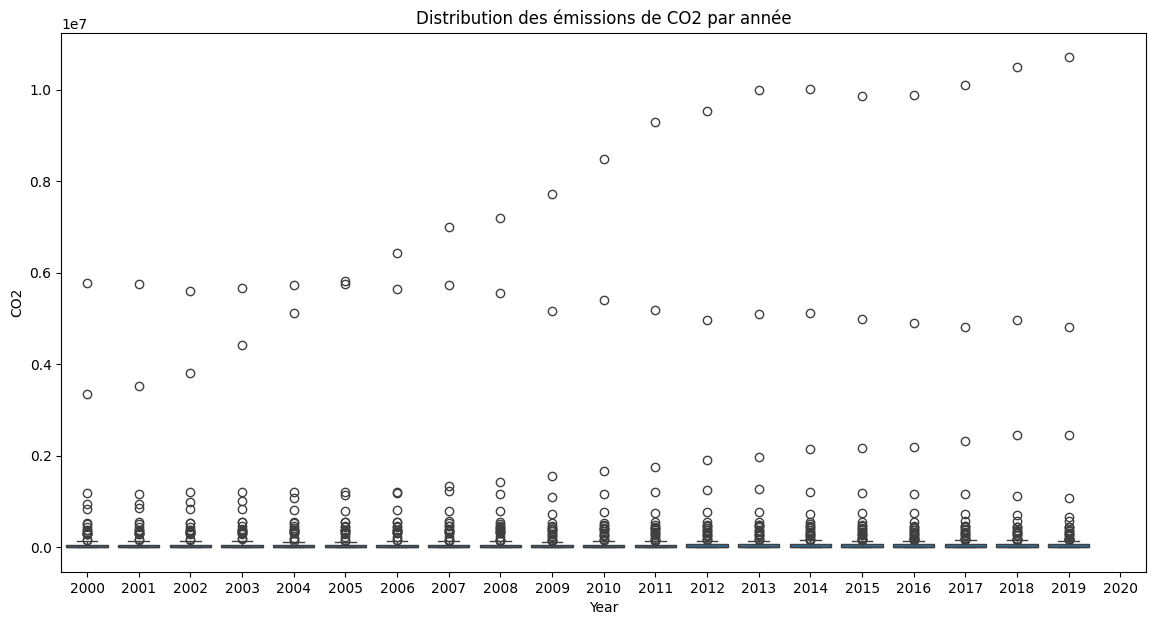

In [42]:
# Boxplot des émissions de CO2 par année
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_, x='Year', y='CO2')
plt.title('Distribution des émissions de CO2 par année')
plt.show()

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


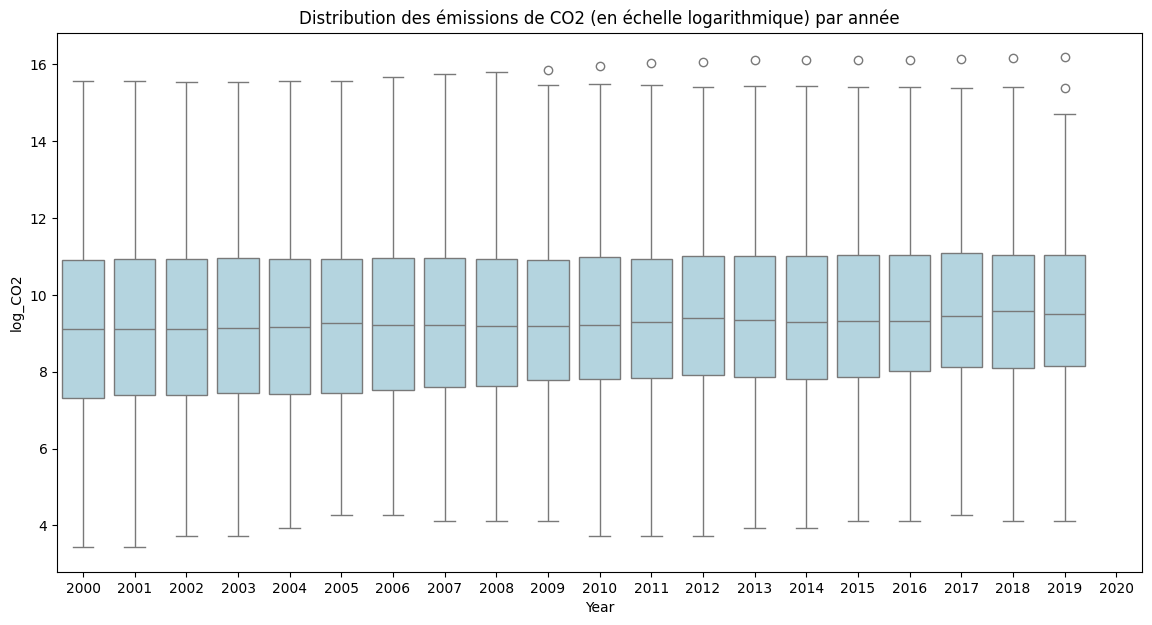

In [43]:
# Boxplot des émissions de CO2 par année
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Year', y='log_CO2',color='lightblue')
plt.title('Distribution des émissions de CO2 (en échelle logarithmique) par année')
plt.show()

Interprétation : 

Le premier graphique est très difficile à interpréteer. Cela s'explique par les émissions importantes des pays les plus polluants qui sont visibles sous forme "d'ouliers" et applatissent les boxplots. Les répartitions sont trop désiquilibrées. Nous avons pu observer une tendance Gaussienne de la variable CO2 après transformation logarithmique. Le deuxième graphique représente des boxplots des émissions de CO2 en échelle logarithmique au cours du temps. 

Sur ce deuxième graphique, nous avons décidé de transformer la variable CO2 avec une transformation logarithimique comme vu précédemment. L'utilisation de l'échelle logarithmique est justifiée par le fait que les émissions de CO2 ont une large gamme de valeurs. Ainsi, le logarithme aide à mieux visualiser les différences, surtout lorsque les données s'étendent sur plusieurs ordres de grandeur, comme c'est le cas sur le premier graphique.

* Médiane et quartiles : Chaque boîte représente la distribution des émissions de CO2 pour une année donnée, où la ligne centrale de la boîte indique la médiane des émissions de CO2. Les bords de la boîte représentent le premier et le troisième quartile, montrant la répartition centrale des données.

* Variabilité : Les moustaches des box s'étendent depuis le haut et le bas de chaque boîte jusqu'aux valeurs maximales et minimales dans l'intervalle interquartile (souvent jusqu'au dernier point situé à moins de 1,5 fois l'écart interquartile du bord de la boîte), montrant la variabilité totale des émissions de CO2 pour chaque année.

* Outliers : Les points au-dessus des moustaches sont considérés comme des outliers. Ces points représentent des années où les émissions de CO2 étaient exceptionnellement élevées par rapport aux autres années.

* Tendance temporelle : En comparant les boîtes d'une année à l'autre, on ne note pas de changement significatif dans la médiane sur le long terme, ce qui suggérerait que la médiane des émissions de CO2 (sur l'échelle logarithmique) est restée relativement constante au cours de cette période.

* Inégalité dans les émissions : L'ampleur des moustaches et la présence de outliers soulignent l'inégalité dans les émissions de CO2 entre différents pays. Certaines années ont des émissions particulièrement élevées qui se détachent des tendances générales.


## 1.6 - Conclusion sur la partie exploratoire des données

Finalement, cette analyse exploratoire de notre jeu de données nous a permis de visualiser les différences considérables d'échelles et de gaussianité entre nos données. Tout d'abord, nous avons vu que notre jeu de données comporte beaucoup de valeurs manuantes. Dans un premier temps, nous avons décidé de supprimer les colonnes comportant trop de valeurs manquantes, puis les dernières lignes en comportant. De plus, nous avons constaté des fortes différences d'échelles entre nos données. En effet, des poucentages d'accès à l'électricité ne sont pas du même odre de grandeur que des valeurs d'émissions de CO2. Nous avons vu que certaines données ne suivaient pas une tendance gaussienne, mais cet aspect était amélioré avec des transformation comme une transformtion logarithmique. Dans une future partie de modélisation, il sera intéressant de rendre nos données les plus gaussiennes possibles pour améliorer la qualité de notre modèle. 

Aussi, nous avons vu des fortes disparités entre les pays sur les émissions de CO2 : quelques pays avaient leurs émissions arrondies à 0, alors que d'autres avaient des émissions très importantes. Le classement des pays les plus émetteurs dépend de la superficie des pays et des émissions par habitant. 

Notre étude multi-dimensionnelle nous a permis de montrer que les émissions de CO2 sont fortement influencées par le répartition du mix énergétique d'un pays : les énergies fossiles influencent énormément les émissions de CO2, alors que l'utilisation d'énergie nucléaire a un impact assez neutre. Sur cette étude, l'utilisation d'énergie renouvlable n'améliorait pas la situation si le pays était dépendant des énergies fossiles. D'autres vaiables comme la densité, la superficie ou les coordonnées géographiques ont un impact neutre sur les émissions de CO2. Avec cette étude, nous pourrions envisager l'utilisation d'un modèle de régression linéaire en utilisant uniquement la variable 'Fossil_elec' pour prédire les valeurs des émissions de CO2.

Puis, en réalisant une Analyse en Composantes Principales, nous avons pu passer de 18 à 7 dimensions sur notre jeu de données et émettre des hypothèses sur les significations des composantes principales avec l'étude des chargements des composantes. 

Pour finir, nous avons observé l'évolution des émissions de CO2 en fonction des années. L'hétérogénéité des émissions est d'autant plus marquée avec la présence d'outliers sur les boxplots. Une transformation des émissions de CO2 en échelle logarithmique nous a permis de mieux visualiser la médiane et les quantiles qui avaient des évolutions plus constantes, indépendamment de l'évolution importante de la valeur des outliers.

# 2 - Modélisation

Nous considérons maintenant le problème de la prédiction la variable 'CO2' à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent.

## 2.1 - Transformation des données

### 2.1.1 - Visualisation avant transformation

Comme étudié et expliué dans la première partie, nous avons vu que beaucoup de données de notre dataframe ne suivaient pas forcément de tendance gaussienne. Cependant, dans l'objectif d'un modèle plus performant, il est important d'appliquer ds transformations sur nos données. Nous allons créer un nouveau dataframe contenant les mêmes colonnes que notre jeu de données initial avec les transformations appliquées.

In [44]:
df = data.iloc[:, 0:18].copy() # Création du nouveau dataframe qui sera transformé

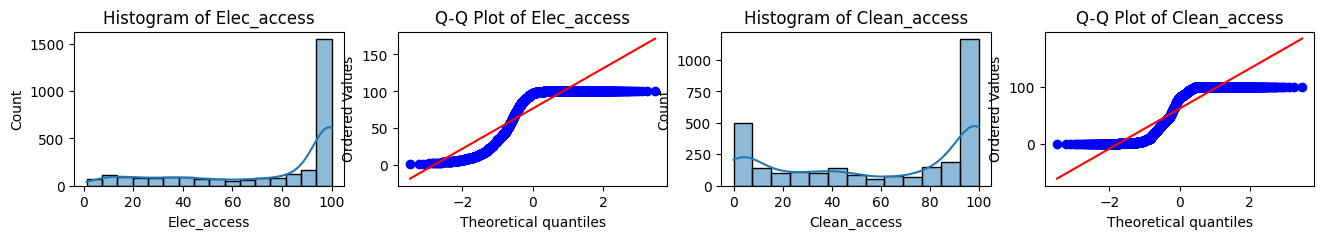

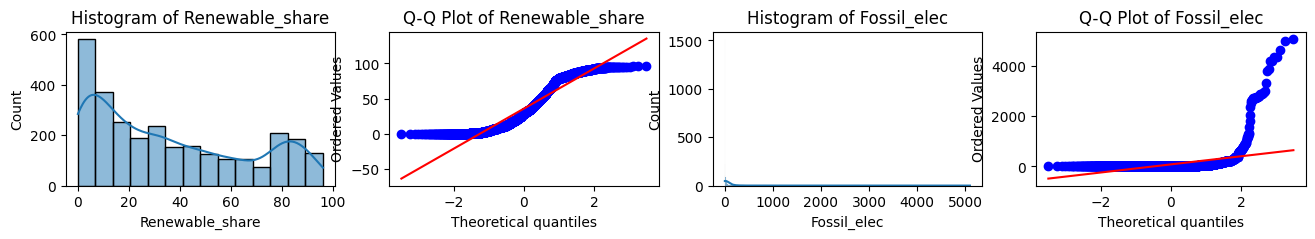

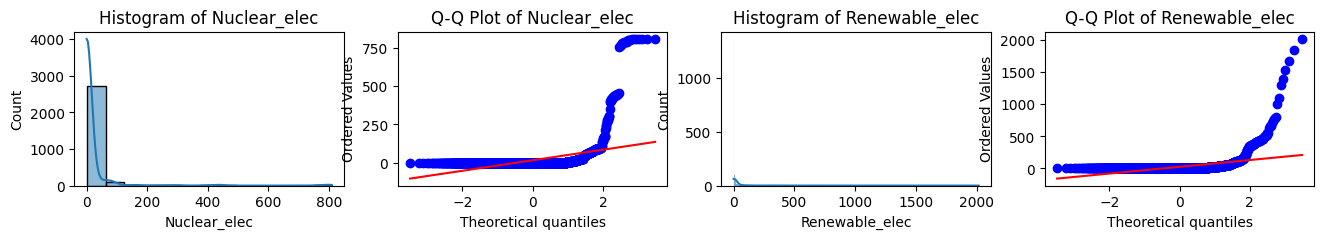

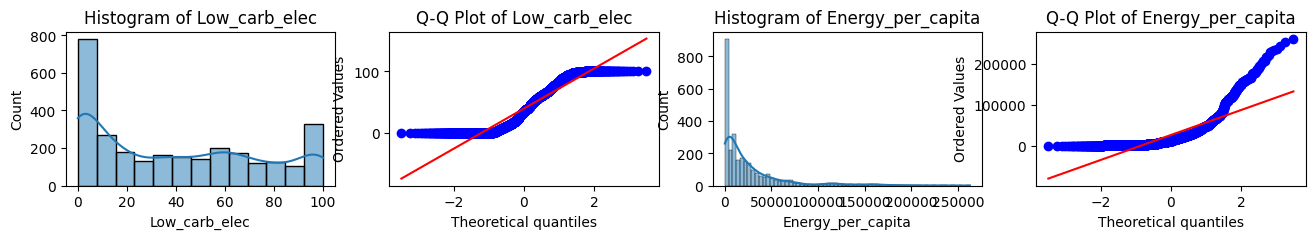

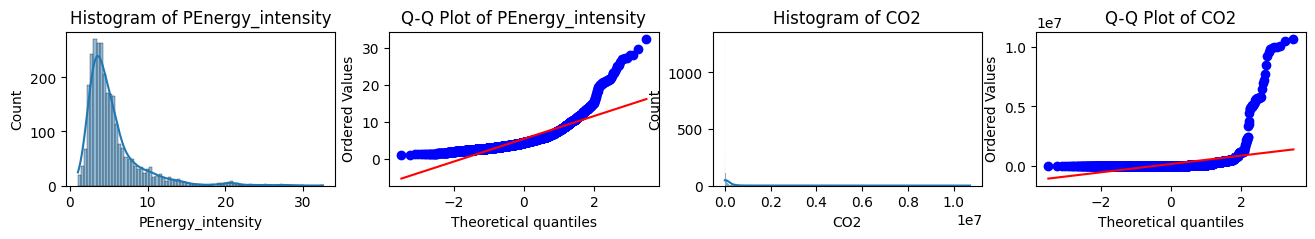

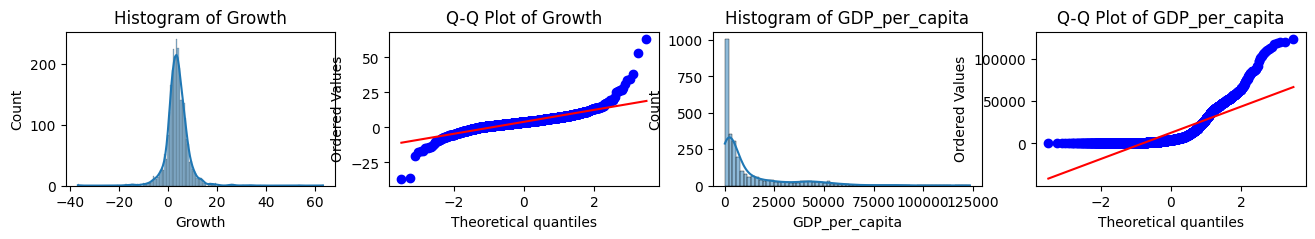

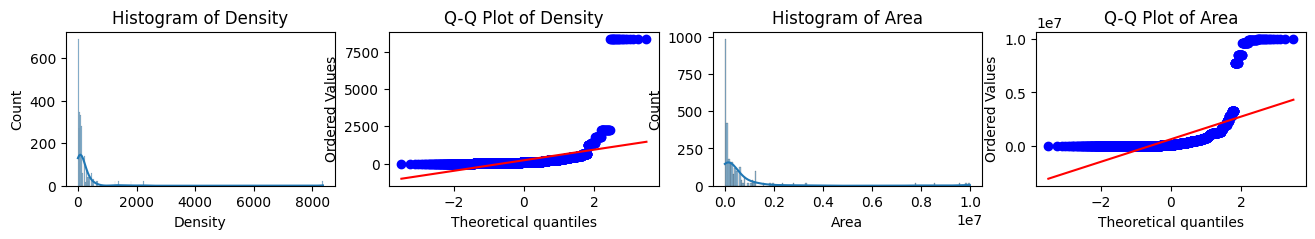

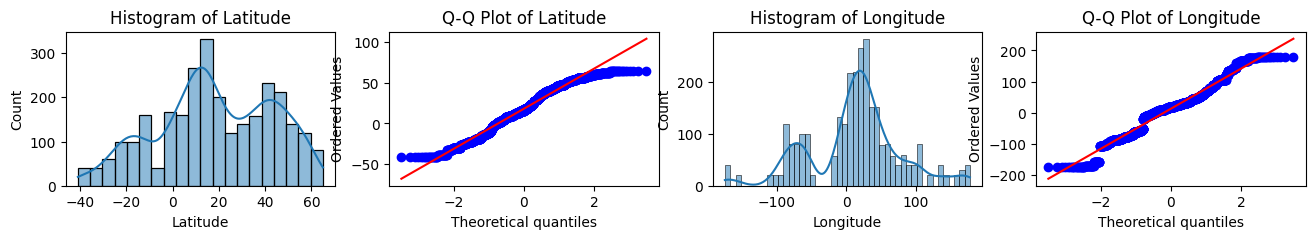

In [45]:
# Histogrammes et Q-Q plots pour visualiser les distributions
a=1

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    
    if a==1:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 2))
    
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax1)
        ax1.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of {column}')
    else:
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax3)
        ax3.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax4)
        ax4.set_title(f'Q-Q Plot of {column}')
        
        plt.show()
        a=0
    a+=1

Interprétation : 

Nous observons que la plupart de nos données ne sont pas gaussiennes. Il faut donc appliquer les transofrmations appropriées sur les données qui le nécessitent afin de les transformer. Pour les trois premières variables (Elec_acces, Clean_access, Renewable_share), le QQ-plot de nos données est assez spécifique et ne voit pas sa tendance modifiée par les transformations élémentaires (logarithmique, racine carrée, ou autre). Nous décidons dans un premier temps de laisser ces données sans transformation. 



### 2.1.2 - Transformation et visualisation

In [46]:
df['Fossil_elec'] = np.log(df['Fossil_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Fossil_elec' : 'log_Fossil_elec'}, inplace = True)

df['Nuclear_elec'] = np.log(df['Nuclear_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Nuclear_elec' : 'log_Nuclear_elec'}, inplace = True)

df['Renewable_elec'] = np.log(df['Renewable_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Renewable_elec' : 'log_Renewable_elec'}, inplace = True)

df['Low_carb_elec'] = np.log(df['Low_carb_elec']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Low_carb_elec' : 'sqrt_Low_carb_elec'}, inplace = True)

df['Energy_per_capita'] = np.log(df['Energy_per_capita']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Energy_per_capita' : 'log_Energy_per_capita'}, inplace = True)

df['CO2'] = np.log(df['CO2']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'CO2' : 'log_CO2'}, inplace = True)

df['PEnergy_intensity'] = np.log(df['PEnergy_intensity']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'PEnergy_intensity' : 'log_PEnergy_intensity'}, inplace = True)

df['GDP_per_capita'] = np.log(df['GDP_per_capita']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'GDP_per_capita' : 'log_GDP_per_capita'}, inplace = True)

df['Density'] = np.log(df['Density']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Density' : 'log_Density'}, inplace = True)

df['Area'] = np.log(df['Area']+1) # +1 pour gérer les valeurs de 0
df.rename(columns = {'Area' : 'log_Area'}, inplace = True)

print(df.shape)
df.head()

(2868, 18)


,Entity,Year,Elec_access,Clean_access,Renewable_share,log_Fossil_elec,log_Nuclear_elec,log_Renewable_elec,sqrt_Low_carb_elec,log_Energy_per_capita,log_PEnergy_intensity,log_CO2,Growth,log_GDP_per_capita,log_Density,log_Area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.270027,0.0,0.488580,4.219821,5.442280,0.875469,7.107425,8.832278,5.255847,4.110874,13.388154,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.285179,0.0,0.444686,4.157653,5.324137,0.788457,6.938284,1.414118,5.358387,4.110874,13.388154,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.292670,0.0,0.463734,4.165748,5.533663,0.879627,7.346655,11.229715,5.493190,4.110874,13.388154,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.182322,0.0,0.494696,4.346276,5.721691,0.916291,7.473637,5.357403,5.578724,4.110874,13.388154,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.182322,0.0,0.559616,4.381369,5.872906,0.928219,7.479300,13.826320,5.888028,4.110874,13.388154,33.93911,67.709953


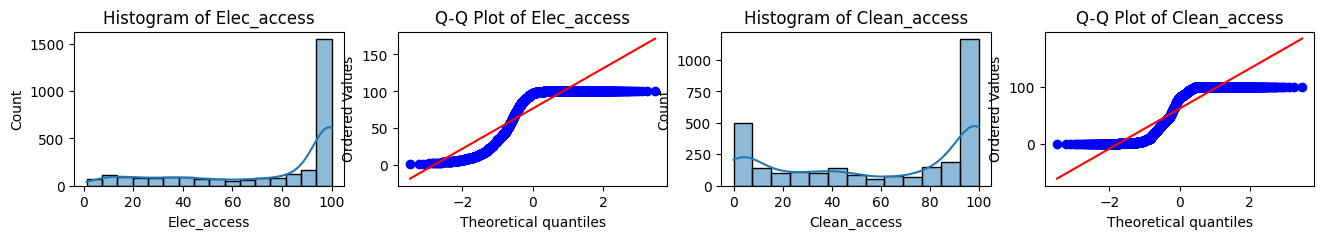

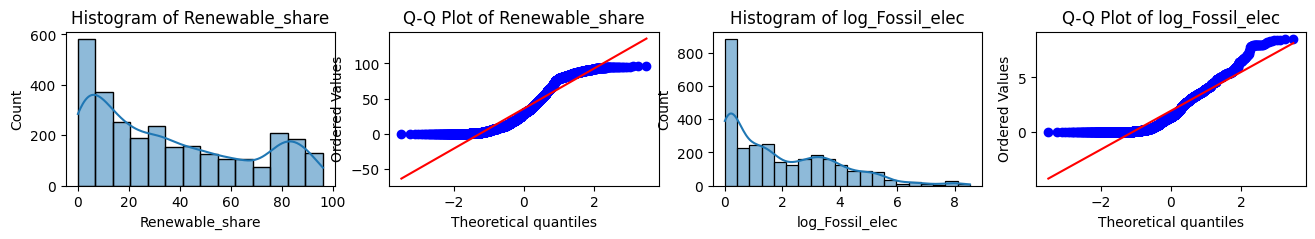

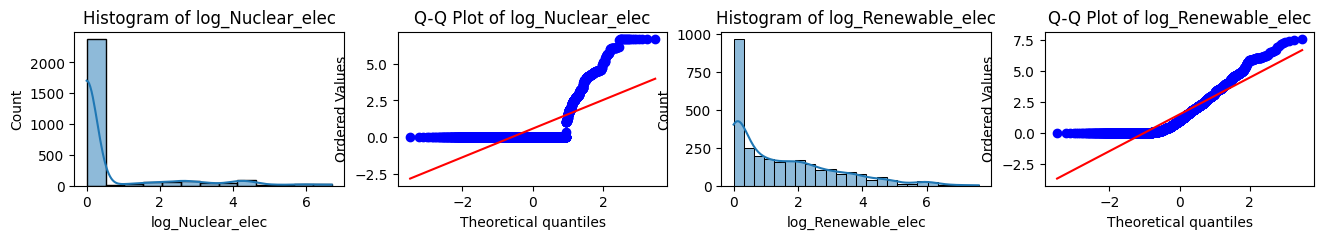

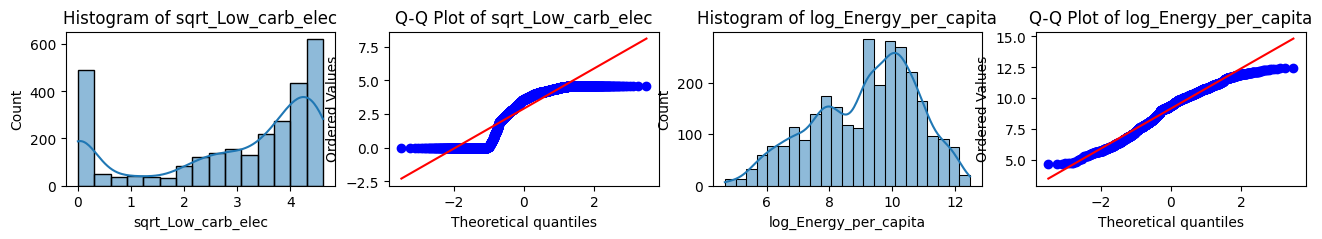

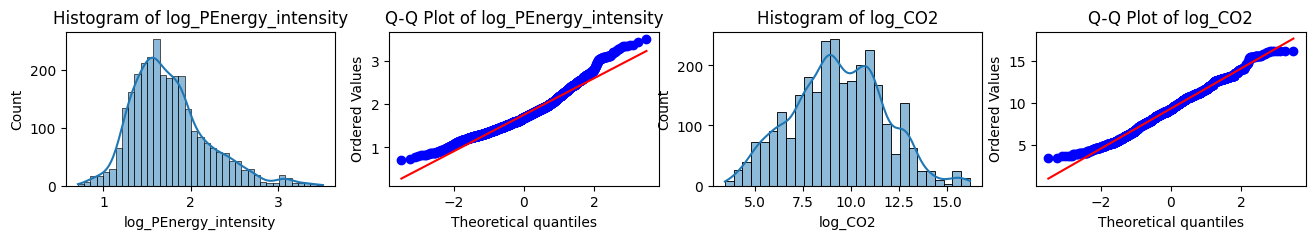

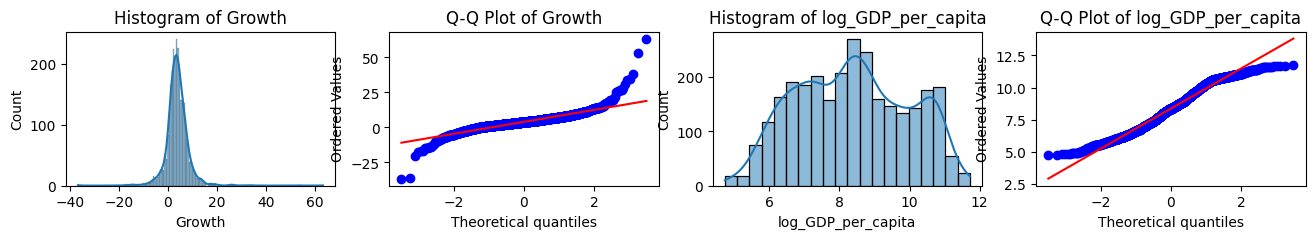

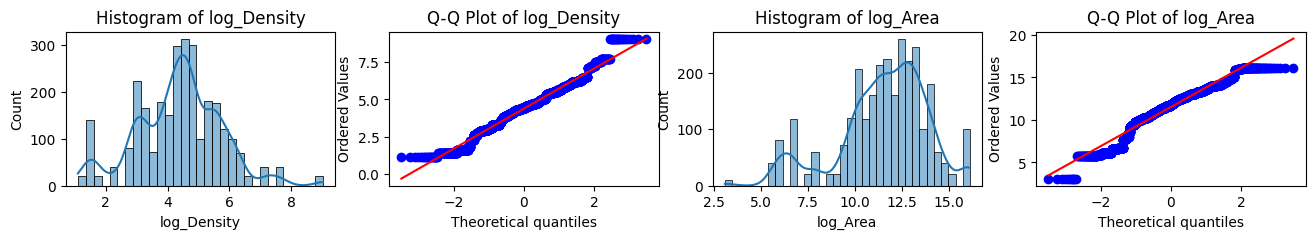

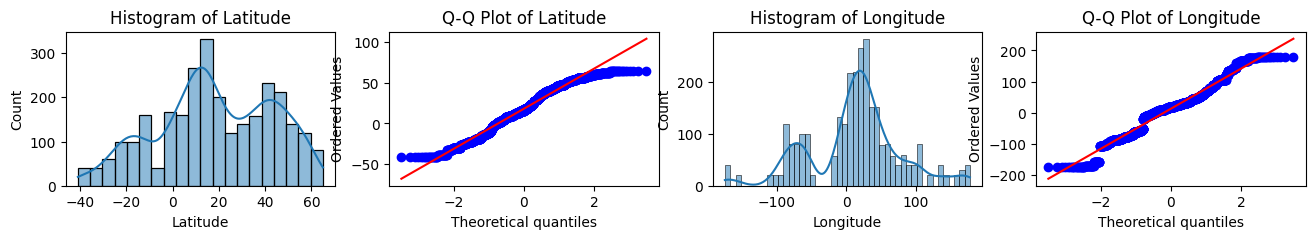

In [47]:
# Histogrammes et Q-Q plots pour visualiser les distributions après transformation
a=1

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    
    if a==1:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 2))
    
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax1)
        ax1.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of {column}')
    else:
        # Histogramme
        sns.histplot(df[column], kde=True, ax=ax3)
        ax3.set_title(f'Histogram of {column}')
    
        # Q-Q plot
        stats.probplot(df[column], dist="norm", plot=ax4)
        ax4.set_title(f'Q-Q Plot of {column}')
        
        plt.show()
        a=0
    a+=1

### 2.1.3 - Suppression de la variable 'Fossil_elec'

Comme étudié dans l'analyse exploratoire des données, la variable 'Fossil_elec' est extrêmement corrélée avec les émissions de CO2. Nous décidons de la supprimer de notre DataFrame pour la modélisation. Nous réaliserons un modèle de régréssion linéaire avec cette variable uniquement, pour comparer les différents résultats.

In [48]:
df.drop('log_Fossil_elec', axis=1, inplace=True)

## 2.2 - Division du jeu de données

Nous allons diviser notre jeu de données entre un échantillon d'apprentissage et un échantillon de test. Nous choisissons une répartition avec 80% des données pour l'apprentissage et 20% pour le test. Cette étape est très importante afin d'avoir un équilibre des données entre l'entraînement et le test. Une première option pourrait être de choisir aléatoirement 80% des données pour l'entraïnement et le reste pour le test. Dans un objectif de recherche de performance, nous pourrions aussi avoir une répartition équilibrée de la présence des pays dans le train et dans le test, et ainsi, découper nos échantillons en fonction de ce paramètre. Enfin, nous pourrions découper nos échantillons par cross-validation, en créant une fonction.

Nous allons tester les trois méthodes pour comparer les performances. 

In [49]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

In [50]:
# Création d'une fonction d'évaluation de la performance des modèles 

def performance(X_test, Y_test, Y_pred) : 
    # Évaluation du modèle en utilisant la métrique de l'erreur quadratique moyenne (RMSE)
    rmse = mean_squared_error(Y_test, Y_pred, squared=False)
    print("RMSE:", rmse)

    # Calcul de l'erreur absolue moyenne (MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    print("MAE:", mae)

    # Calcul du coefficient de détermination (R²)
    r2 = r2_score(Y_test, Y_pred)
    print("R²:", r2)

    # Calcul du R² ajusté
    n = X_test.shape[0]  # Nombre d'échantillons dans l'ensemble de test
    p = X_test.shape[1]  # Nombre de variables explicatives
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print("R² ajusté:", r2_adj)    

Nous décidons de créer une fonction de calcul d'erreur pour évaluer la performance de nos modèles selon les mêmes critères. 

* RMSE (Erreur Quadratique Moyenne) : Le RMSE mesure l'écart moyen entre les valeurs prédites par votre modèle et les valeurs réelles dans l'unité de la variable cible. Plus le RMSE est faible, meilleure est la capacité prédictive du modèle

* Erreur Moyenne Absolue (MAE) : Cette métrique calcule la moyenne des valeurs absolues des écarts entre les prédictions du modèle et les valeurs réelles. Elle est moins sensible aux valeurs aberrantes que le RMSE.

* Coefficient de détermination (R²) : Le coefficient de détermination mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle. Il varie entre 0 et 1, où 1 indique un ajustement parfait.

* R² Ajusté : Le R² ajusté est une version ajustée du R² qui tient compte du nombre de variables dans le modèle et du nombre d'échantillons dans l'ensemble de données. Le R² ajusté est souvent utilisé pour comparer différents modèles, en tenant compte du risque de surajustement.

### 2.2.1 - Division aléatoire

In [51]:
# Préparation des données d'entraînement
dff = df.copy() # On ne veut pas la variable à prédire dans le X_train, mais que dans Y_train
dff.drop('log_CO2', axis=1, inplace=True)

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(dff,df['log_CO2'],test_size=int(df.shape[0]*0.2),random_state=42)

# Pour ne conserver que les données quantitatives dans le train 
X_train_quanti = X_train.drop(['Entity','Year'],axis=1)

### 2.2.2 - Division avec un équilibre entre la présence des pays dans chaque échantillon

### 2.2.3 - Echantillonnage par validation croisée

In [53]:
X_train.head()

,Entity,Year,Elec_access,Clean_access,Renewable_share,log_Nuclear_elec,log_Renewable_elec,sqrt_Low_carb_elec,log_Energy_per_capita,log_PEnergy_intensity,Growth,log_GDP_per_capita,log_Density,log_Area,Latitude,Longitude
1795,Kuwait,2009,100.000000,100.0,0.00,0.00000,0.000000,0.000000,11.735903,2.059239,-7.076056,10.533768,5.484797,9.788021,29.311660,47.481766
2485,Norway,2013,100.000000,100.0,57.42,0.00000,4.878398,4.593720,11.549382,1.680828,1.034073,11.541653,2.772589,12.687891,60.472024,8.468946
2335,Netherlands,2010,100.000000,100.0,3.85,1.60342,2.500616,2.619418,11.162651,1.611436,1.342739,10.838620,6.232448,10.634508,52.132633,5.291266
858,Cuba,2018,99.521210,93.5,24.11,0.00000,1.098612,2.414422,9.192192,0.862890,2.248480,9.085366,4.672829,11.616032,21.521757,-77.781167
811,Costa Rica,2013,99.563515,93.6,37.80,0.00000,2.290513,4.486768,9.360438,1.229641,2.494766,9.282204,4.615121,10.841559,9.748917,-83.753428


## 2.3 - Modélisation par régression linéaire

### 2.3.1 - Régression linéaire sans sélection de variable

In [54]:
# Création d'un modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train.drop(['Entity','Year'],axis=1), Y_train)

# Prédiction sur les données de test
Y_pred = model.predict(X_test.drop(['Entity','Year'],axis=1))

performance(X_test, Y_test, Y_pred) # Evaluation de la performance du modèle

RMSE: 0.3273126151394687
MAE: 0.2460720622709802
R²: 0.9809721656157647
R² ajusté: 0.9804246020363623


c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Interprétation : 

* RMSE (Erreur Quadratique Moyenne) : Le RMSE est de 0.3273. Cela signifie que, en moyenne, les prédictions de votre modèle diffèrent d'environ 0.3273 unités de la variable cible par rapport aux valeurs réelles. Plus le RMSE est faible, meilleure est la capacité prédictive du modèle.

* MAE (Erreur Absolue Moyenne) : Le MAE est de 0.2461, cela signifie que, en moyenne, les prédictions de votre modèle diffèrent d'environ 0.2461 unités de la variable cible par rapport aux valeurs réelles. Comme pour le RMSE, un MAE plus bas indique une meilleure précision du modèle.

* R² (Coefficient de Détermination) : Avec une valeur de R² de 0.9810, cela signifie que notre modèle explique environ 98.10 % de la variance totale de la variable cible. Un R² plus élevé indique une meilleure capacité du modèle à expliquer la variance des données observées.

* R² Ajusté : Une valeur de R² ajusté de 0.9804 signifie que notre modèle ajusté explique environ 98.04 % de la variance totale de la variable cible. Le R² ajusté est souvent utilisé pour comparer différents modèles, en tenant compte du risque de surajustement.

En conclusion, ces résultats suggèrent que le modèle de régression linéaire sans sélection de variable présente une très bonne performance de prédiction, avec un bon ajustement aux données et une capacité élevée à expliquer la variance de la variable cible. Nous allons maintenant comparer ces résultats en faisaint des modèles de régressions linéaires sur certianes variables judicieusement sélectionnées.

### 2.3.2 - Régression linéaire avec sélection de variable selon Backward/Forward 

Les méthodes de sélection de variables par "backward" (en arrière) et "forward" (en avant) sont des approches itératives utilisées pour sélectionner un sous-ensemble optimal de variables explicatives pour un modèle de régression. 

* Sélection Backward (en arrière) :
Cette approche commence par un modèle comprenant toutes les variables explicatives. À chaque itération, une variable est retirée du modèle. La variable retirée est celle qui a le moins d'impact sur la performance du modèle. La performance du modèle est évaluée en utilisant le critère BIC dans notre cas. Le processus continue jusqu'à ce qu'aucune amélioration significative de la performance du modèle ne soit observée après la suppression d'une variable.

* Sélection Forward (en avant) :
Cette approche commence avec un modèle vide qui ne contient aucune variable explicative. À chaque étape, une variable est ajoutée au modèle. La variable ajoutée est celle qui améliore le plus la performance du modèle. selon le critère d'information BIC. Le processus continue jusqu'à ce qu'aucune amélioration significative de la performance du modèle ne soit observée après l'ajout d'une variable.

Nous allons mettre en place ces deux méthodes, implémenter des modèles de régressions linéaires associés, et comparer les résultats obtenus entre eux, ainsi qu'avec le modèle de régression linéaire sans sélection de variables.

In [55]:
import statsmodels.api as sm

# Fonction pour calculer le BIC pour un modèle
def calculate_bic(y, X):
    model = sm.OLS(y, X).fit()
    return model.bic

# Fonction pour la sélection de caractéristiques backward basée sur BIC
def backward_feature_selection(data, target_name, initial_features):
    features = initial_features.copy()
    results = []
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        model = sm.OLS(data[target_name], features_with_constant).fit()
        bic = calculate_bic(data[target_name], features_with_constant)

        results.append((features.copy(), bic))

        # Trouver la feature avec le p-value le plus élevé et le retirer
        p_values = model.pvalues.iloc[1:]  # exclure la constante
        worst_feature = p_values.idxmax()
        
        if len(features) == 1 or p_values.max() > 0.05:  # Seuil de p-value ou si reste une seule feature
            break

        features.remove(worst_feature)
    
    # Trier les résultats pour trouver le modèle avec le BIC le plus faible
    results.sort(key=lambda tup: tup[1])
    best_features, best_bic = results[0]
    
    print(f"Best BIC: {best_bic} with features: {best_features}")
    return best_features

# Application à notre situation
initial_features = dff.columns.drop(['Entity', 'Year']).tolist()
selected_features_backward = backward_feature_selection(df, 'log_CO2', initial_features)
print(f"Selected features after forward selection based on BIC: {selected_features_backward}")
print(f"Number of selected features: {len(selected_features_backward)}")

Best BIC: 1782.902614124408 with features: ['Elec_access', 'Clean_access', 'Renewable_share', 'log_Nuclear_elec', 'log_Renewable_elec', 'sqrt_Low_carb_elec', 'log_Energy_per_capita', 'log_PEnergy_intensity', 'Growth', 'log_GDP_per_capita', 'log_Density', 'log_Area', 'Latitude', 'Longitude']
Selected features after forward selection based on BIC: ['Elec_access', 'Clean_access', 'Renewable_share', 'log_Nuclear_elec', 'log_Renewable_elec', 'sqrt_Low_carb_elec', 'log_Energy_per_capita', 'log_PEnergy_intensity', 'Growth', 'log_GDP_per_capita', 'log_Density', 'log_Area', 'Latitude', 'Longitude']
Number of selected features: 14


In [56]:
# Fonction pour la sélection de caractéristiques Forward basée sur BIC
def forward_feature_selection(data, target_name, candidate_features):
    features = []
    results = []
    while len(candidate_features) > 0:
        bic_scores = []
        for feature in candidate_features:
            tested_features = features + [feature]
            features_with_constant = sm.add_constant(data[tested_features])
            model = sm.OLS(data[target_name], features_with_constant).fit()
            bic = calculate_bic(data[target_name], features_with_constant)
            bic_scores.append((feature, bic))
        
        # Trouver la feature avec le BIC le plus bas
        new_feature, new_bic = min(bic_scores, key=lambda x: x[1])
        
        # Si l'ajout de la nouvelle feature améliore le BIC
        if len(results) == 0 or new_bic < results[-1][1]:
            features.append(new_feature)
            candidate_features.remove(new_feature)
            results.append((features.copy(), new_bic))
            print(f"Adding {new_feature}, BIC: {new_bic}")
        else:
            break
    
    # Trier les résultats pour trouver le modèle avec le BIC le plus faible
    results.sort(key=lambda tup: tup[1])
    best_features, best_bic = results[0]
    
    print(f"Best BIC: {best_bic} with features: {best_features}")
    return best_features

# Exemple d'utilisation:
# Remplacez 'df', 'log_CO2' et 'initial_features' par vos vraies données et colonnes
candidate_features = df.columns.drop(['Entity', 'Year', 'log_CO2']).tolist()
selected_features_forward = forward_feature_selection(df, 'log_CO2', candidate_features)
print(f"Selected features after forward selection based on BIC: {selected_features_forward}")
print(f"Number of selected features: {len(selected_features_forward)}")


Adding log_Renewable_elec, BIC: 11238.984413123624
Adding Renewable_share, BIC: 10153.855100015267
Adding log_Area, BIC: 8659.968161553134
Adding log_Density, BIC: 6527.114333204143
Adding log_Energy_per_capita, BIC: 2714.8852990136966
Adding log_GDP_per_capita, BIC: 2365.847283323687
Adding Elec_access, BIC: 2101.0690981942685
Adding log_PEnergy_intensity, BIC: 1892.4043441469464
Adding Clean_access, BIC: 1791.517593850313
Adding Growth, BIC: 1780.0593344281765
Adding Latitude, BIC: 1768.4303339636222
Best BIC: 1768.4303339636222 with features: ['log_Renewable_elec', 'Renewable_share', 'log_Area', 'log_Density', 'log_Energy_per_capita', 'log_GDP_per_capita', 'Elec_access', 'log_PEnergy_intensity', 'Clean_access', 'Growth', 'Latitude']
Selected features after forward selection based on BIC: ['log_Renewable_elec', 'Renewable_share', 'log_Area', 'log_Density', 'log_Energy_per_capita', 'log_GDP_per_capita', 'Elec_access', 'log_PEnergy_intensity', 'Clean_access', 'Growth', 'Latitude']
Numb

Notre objectif est de sélectionner la combinaisond e varibles qui permettent de minimiser le critère BIC. Ainsi, en appliquant les méthodes Backward et Forward développées précédememnt, nous obtenons respectivement une sélection de 14 et 11 variables pour nos régressions linéaires avec sélection de variable.

Ces différences de résultats peuvent s'expliquer par la sensibilité des méthodes à l'ordre de la sélection de variables, ou encore aux éventuelles corrélations entre les variables ajoutées ou retirées, que nous avons étudié dans la partie précédente.

In [57]:
# Régression linéaire sur une sélection de variables par la méthode Backward

# Création du modèle de régression linéaire
model = LinearRegression()

# Ajustement du modèle sur le jeu d'entraînement en utilisant seulement les variables sélectionnées
model.fit(X_train[selected_features_backward], Y_train)

# Prédiction sur le jeu d'entraînement (pour l'évaluation du modèle)
Y_pred = model.predict(X_test.drop(['Entity','Year'],axis=1))

performance(X_test, Y_test, Y_pred) # Evaluation de la performance du modèle

RMSE: 0.3273126151394687
MAE: 0.2460720622709802
R²: 0.9809721656157647
R² ajusté: 0.9804246020363623


c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
# Régression linéaire sur une sélection de variables par la méthode Forward

# Création du modèle de régression linéaire
model = LinearRegression()

# Utilisation des variables sélectionnées par la méthode Forward
X_train_selected = X_train[selected_features_forward]
X_test_selected = X_test[selected_features_forward]

# Ajustement du modèle sur le jeu d'entraînement en utilisant seulement les variables sélectionnées
model.fit(X_train_selected, Y_train)

# Prédiction sur le jeu de test en utilisant seulement les variables sélectionnées
Y_pred = model.predict(X_test_selected)
performance(X_test, Y_test, Y_pred) # Evaluation de la performance du modèle

RMSE: 0.3271858437862187
MAE: 0.2463613188368686
R²: 0.9809869020913636
R² ajusté: 0.9804397625832014


c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 2.4 Support Vector Machine (SVM)

In [71]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix


Le principe des SVM (Support Vector Machine) consiste à ramener un problème de classification ou de discrimination à un hyperplan dans lequel les données sont séparées en plusieurs classes dont la frontière est la plus éloignée possible des points de données (ou marge maximale).

### 2.4.1 Choix du noyau et optimisation des paramètres par validation croisée

In [65]:
# Choix du noyau 
# --------------------------------

# Création du modèle SVM avec un noyau linéaire
svm_linear = SVC(kernel='linear')
# Création du modèle SVM avec un noyau polynomial
svm_poly = SVC(kernel='poly')
# Création du modèle SVM avec un noyau radial
svm_rad = SVC(kernel='rbf')

# Préparation des hyperparamètres à optimiser
param_grid = {
    'gamma': np.arange(0.1, 2.2, 0.2),  # gamma varie de 0.1 à 2 par pas de 0.2
    'C': [1, 25, 50, 75, 100, 150, 200, 500]  # Coûts de pénalisation
}

# Création de l'objet GridSearchCV
grid_search_linear = GridSearchCV(svm_linear, param_grid, cv=5, scoring='accuracy', verbose=1)

# Ajustement du GridSearchCV sur l'ensemble d'entraînement
grid_search_linear.fit(X_train.drop(['Entity','Year'],axis=1), Y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres:", grid_search_linear.best_params_)
print("Meilleur score d'accuracy:", grid_search_linear.best_score_)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


ValueError: 
All the 440 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
440 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 739, in _validate_targets
    check_classification_targets(y)
  File "c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [85]:
# Encodage one-hot de 'Entity' et 'Year'
X_train_encoded = pd.get_dummies(X_train, columns=['Entity', 'Year'])
X_test_encoded = pd.get_dummies(X_test, columns=['Entity', 'Year'])

# S'assurer que X_train_encoded et X_test_encoded ont les mêmes colonnes après l'encodage
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

# Choix du noyau 
# --------------------------------

# Création du modèle SVM avec un noyau linéaire
svm_linear = SVR(kernel='linear')
# Création du modèle SVM avec un noyau polynomial
svm_poly = SVR(kernel='poly')
# Création du modèle SVM avec un noyau radial
svm_rad = SVR(kernel='rbf')

# --------------------------------

# Préparation des hyperparamètres à optimiser
param_grid_lin = {'C': [0.1, 1, 10, 100]}

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'gamma': [0.1, 1, 10],
    'coef0': [0.0, 1.0]
}

param_grid_rad = {
    'gamma': np.arange(0.1, 2.1, 0.5),  # Gamma varie de 0.1 à 2.1 par pas de 0.5
    'C': [1, 25, 50, 100]  # Coûts de pénalisation à essayer
}

# --------------------------------

# Création de l'objet GridSearchCV pour la recherche d'hyperparamètres
grid_search_lin = GridSearchCV(svm_linear, param_grid_lin, cv=5, scoring='neg_mean_squared_error', verbose=1)  # Utilisation du MSE comme critère
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='neg_mean_squared_error', verbose=1)  # Utilisation du MSE comme critère
grid_search_rad = GridSearchCV(svm_rad, param_grid_rad, cv=5, scoring='neg_mean_squared_error', verbose=1)  # Utilisation du MSE comme critère

# --------------------------------

# Ajustement du GridSearchCV sur l'ensemble d'entraînement encodé
grid_search_lin.fit(X_train_encoded, Y_train)
best_svr_model_lin = grid_search_lin.best_estimator_

grid_search_poly.fit(X_train_encoded, Y_train)
best_svr_model_poly = grid_search_poly.best_estimator_

grid_search_rad.fit(X_train_encoded, Y_train)
best_svr_model_rad = grid_search_rad.best_estimator_

# --------------------------------

# Affichage des meilleurs paramètres 
print("Noyau linéaire")
print("Meilleurs paramètres:", grid_search_lin.best_params_)
print("")
print("----------------------------------")
print("")
print("Noyau polynomial")
print("Meilleurs paramètres:", grid_search_poly.best_params_)
print("")
print("----------------------------------")
print("")
print("Noyau radial")
print("Meilleurs paramètres:", grid_search_rad.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [83]:
# Pour afficher les vecteurs de support
print("Noyau linéaire : ")
print("Nombre de vecteurs de support :\n", best_svr_model_lin.support_vectors_.shape)
# Pour afficher le nombre de vecteurs de support pour chaque classe
print("Nombre de vecteurs de support par classe :\n", best_svr_model_lin.n_support_)
# --------------------------------
print("--------------------------------")
print("Noyau polynomial : ")
# Pour afficher les vecteurs de support
print("Nombre de vecteurs de support :\n", best_svr_model_poly.support_vectors_.shape)
# Pour afficher le nombre de vecteurs de support pour chaque classe
print("Nombre de vecteurs de support par classe :\n", best_svr_model_poly.n_support_)
# --------------------------------
print("--------------------------------")
print("Noyau radial : ")
# Pour afficher les vecteurs de support
print("Nombre de vecteurs de support :\n", best_svr_model_rad.support_vectors_.shape)
# Pour afficher le nombre de vecteurs de support pour chaque classe
print("Nombre de vecteurs de support par classe :\n", best_svr_model_rad.n_support_)


Nombre de vecteurs de support :
 (1961, 211)
Nombre de vecteurs de support par classe :
 [1961]


### 2.4.2 Comparaison et étude des erreurs de généralistaion

## 2.5 Modélisation par arbre optimal

## 2.6 Modéisation par forêt aléatoire

## 2.7 Récapitulatif et comparaisons des différentes méthodes de modélisation

### 2.7.1 Récapitulatif des résultats obtenus et comparaisons

### 2.7.2 Intérêt des méthodes non linéaires

## 2.8 Application à l'échantillon de test